In [1]:
import numpy as np
import matplotlib.pyplot as pyplot
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


<p><font color='blue'> 
                   <h2><font color='brown'>Contents</font></h2> 
                   <ul>
                   <li>Data Processing & Understanding</li>
                   <li>Univariate Analysis</li>    
                   <li>Segmented Univariate Analysis</li>
                   <li>Derivative Analysis</li>    
                   <li>Bivariate Analysis</li>
                   </ul>
              </p>

<p><font color='blue'>
<ul>
    <h2><font color='brown'>Data Processing & Understanding </font></h2>
        <ul>
               <li>Processing NaN
                   <ul>
                   <li>Identifying/Dropping All Nan Columns</li>
                   <li>Cleaning up NaN</li>    
                   </ul>   
               </li> 
               <li>Transforming Columns
                   <ul>
                       <li>Interest Rate</li>
                       <li>Term</li>
                   </ul>
               </li>
               <li>Deriving Variables
                   <ul>
                       <li>Issue Month</li>
                       <li>Loan Id</li>
                   </ul>
               </li>
               <li>Loan Stats & Understanding
                   <ul>
                       <li>Total Loans</li>
                       <li>Total Amount Disbursed</li>
                       <li>Loan Term</li>
                       <li>Interest Range</li>
                       <li>Geographies</li>
                       <li>Loan Purposes</li>
                   </ul>
              </li>
               <li>Imputing Values
                    <ul>
                       <li>Employee Length</li>
                    </ul>   
               </li>
               <li>Removing Single Value Columns</li>
        </ul>

</ul>               
</font></h2>

<h2><font color='brown'>Reading Loan CSV as a dataframe</font></h2>

In [2]:
loan_df=pd.read_csv("C:\\Users\\meenaxi\\Downloads\\loan.csv")


In [3]:
print(loan_df.shape)


(39717, 111)


<h3><font color='brown'> Processing NaN </font></h3>

<h3><font color='brown'>Identifying/Dropping ALL NaN Columns</font></h2>

In [4]:
loan_df_null_columns=loan_df.isnull().all(axis=0)


In [5]:
loan_df_null_columns

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
                              ...  
tax_liens                     False
tot_hi_cred_lim                True
total_bal_ex_mort              True
total_bc_limit                 True
total_il_high_credit_limit     True
Length: 111, dtype: bool

In [6]:
loan_df.drop(columns=loan_df_null_columns[loan_df_null_columns].index,inplace=True)


In [7]:
loan_df.shape

(39717, 57)

In [8]:
100*loan_df.isnull().sum()/len(loan_df.index)


id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


<h4><font color='brown'>Cleaning up columns with 30% or more null values </font></h4>

In [9]:
loan_df.drop(columns=['mths_since_last_delinq','mths_since_last_record','next_pymnt_d','desc'],inplace=True)


In [10]:
print(loan_df.shape)


(39717, 53)


<h3><font color='brown'> Transforming Columns </font></h3>

<h3><font color='brown'> Term  </font></h3>

In [11]:
loan_df.term.value_counts()


term
36 months    29096
60 months    10621
Name: count, dtype: int64

In [12]:
loan_df.term=loan_df.term.apply(lambda x:int(x[:-7]))


In [13]:
loan_df.term.value_counts()


term
36    29096
60    10621
Name: count, dtype: int64

<h3><font color='brown'>Interest Rate </font></h3>

In [14]:
loan_df.int_rate.value_counts()

int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: count, Length: 371, dtype: int64

In [15]:
loan_df.int_rate=loan_df.int_rate.apply(lambda x:float(x[:-1]))


In [16]:
loan_df.int_rate.value_counts()

int_rate
10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: count, Length: 371, dtype: int64

<h3><font color='brown'>Deriving  Variables</font></h3>

<h3><font color='brown'>Issue month</font></h3>

In [17]:
loan_df['issue_month'] = loan_df.issue_d.apply(lambda x:x.split('-')[0])


In [18]:
loan_df.issue_month.value_counts()

issue_month
Dec    4433
Nov    4167
Oct    3934
Sep    3648
Aug    3518
Jul    3476
Jun    3279
May    2999
Apr    2834
Mar    2692
Jan    2379
Feb    2358
Name: count, dtype: int64

<h3><font color='brown'>Loan Id</font></h3>

In [19]:
print(loan_df['url'].value_counts())


url
https://lendingclub.com/browse/loanDetail.action?loan_id=1077501    1
https://lendingclub.com/browse/loanDetail.action?loan_id=568534     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=567165     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568531     1
                                                                   ..
https://lendingclub.com/browse/loanDetail.action?loan_id=785667     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785630     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785626     1
https://lendingclub.com/browse/loanDetail.action?loan_id=87023      1
Name: count, Length: 39717, dtype: int64


In [20]:
loan_df['loan_id'] = loan_df.url.apply(lambda x:x.split('=')[1])
loan_df.drop(columns=['url'],inplace=True)

<h2><font color='brown'>Loan Stats</font></h2>

<h3><font color='brown'>Total Loans</font></h3>

In [21]:
loan_df.loan_status.value_counts().sum()

np.int64(39717)

<Axes: xlabel='loan_status', ylabel='count'>

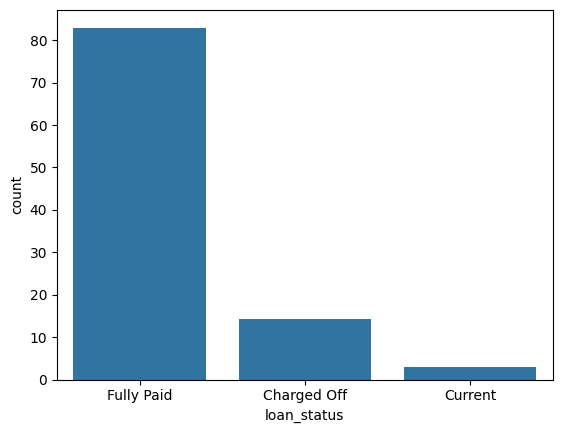

In [22]:
loan_status=(100 * loan_df.loan_status.value_counts()/len(loan_df.index))
sns.barplot(loan_status)

<h3><font color='brown'>Total Amount Disbursed</h3>

In [23]:
loan_df.loan_amnt.sum()

np.int64(445602650)

<h3><font color='brown'>Tenure</h3>

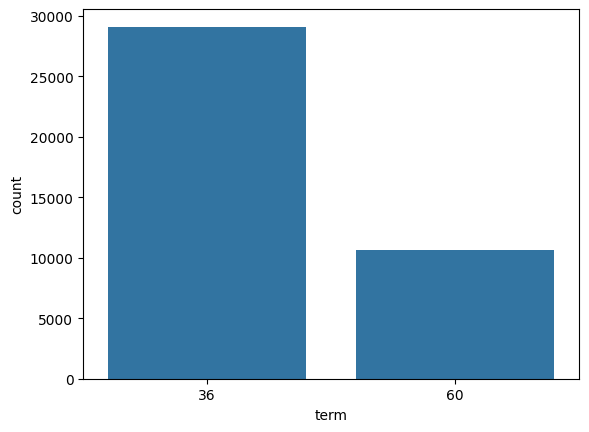

In [24]:
sns.barplot(loan_df.term.value_counts())
pyplot.show()

<h3><font color='brown'>Interest Range</h3>

In [25]:
loan_df.int_rate.describe()


count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

<h3><font color='brown'>Geographies</h3>

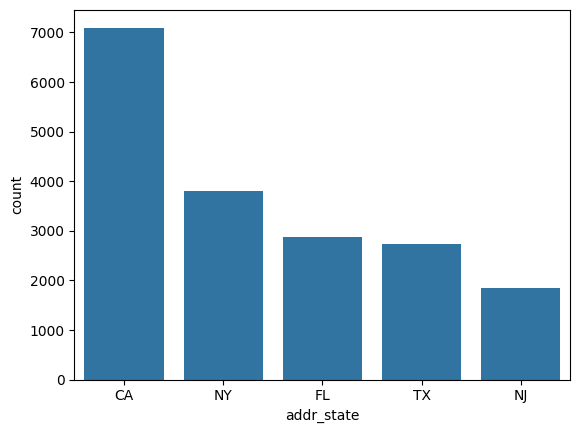

In [26]:
sns.barplot(loan_df.addr_state.value_counts().head())
pyplot.show()

<h3><font color='brown'>Loan Purposes</h3>

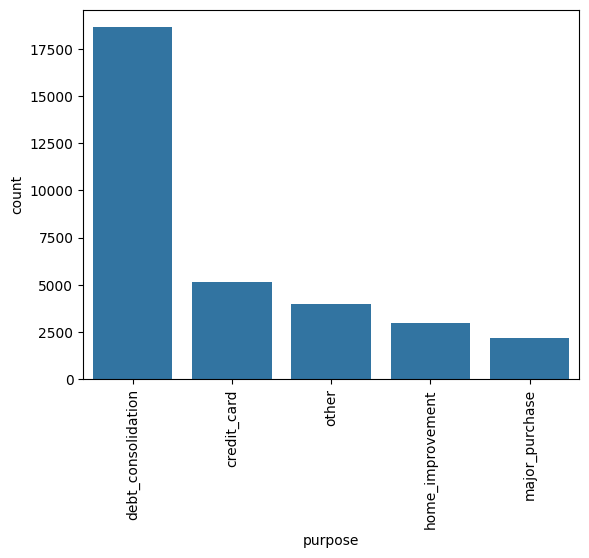

In [27]:
sns.barplot(loan_df.purpose.value_counts().head())
pyplot.xticks(rotation=90)
pyplot.show()

<Axes: xlabel='issue_d', ylabel='count'>

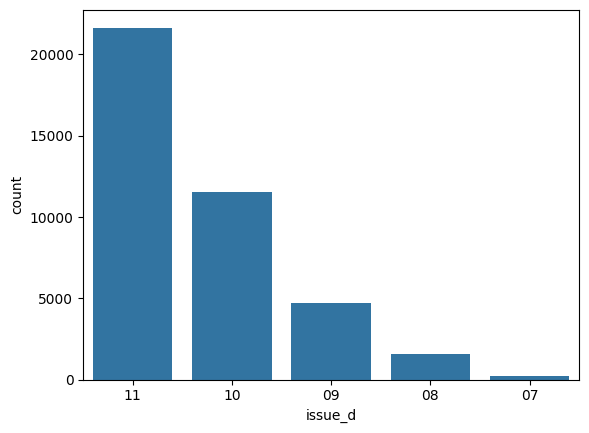

In [28]:
sns.barplot(loan_df.issue_d.str.split('-').str[1].value_counts())

<h3><font color='brown'>Row wise clean up</font></h3>

In [29]:
loan_df.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [30]:
loan_df=loan_df[loan_df.isnull().sum(axis=1)<=1]


In [31]:
print((loan_df.isnull().sum() * 100)/len(loan_df.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     3.606311
emp_length                    0.145081
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
purpose                       0.000000
title                         0.023317
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
inq_last_6mths           

In [32]:
print(loan_df.emp_title.value_counts())

emp_title
US Army                           134
Bank of America                   109
IBM                                66
AT&T                               59
Kaiser Permanente                  56
                                 ... 
Florida Power & Light Company       1
Telefutura Net                      1
adidas                              1
Williamson Eye Center               1
Community Environmental Center      1
Name: count, Length: 28780, dtype: int64


<h3><font color='brown'>Imputing Missing values</font><h3>

<h3><font color='brown'>Imputing values of Employee title with Not Available</font><h3>

In [33]:
print(loan_df.emp_title.value_counts())


emp_title
US Army                           134
Bank of America                   109
IBM                                66
AT&T                               59
Kaiser Permanente                  56
                                 ... 
Florida Power & Light Company       1
Telefutura Net                      1
adidas                              1
Williamson Eye Center               1
Community Environmental Center      1
Name: count, Length: 28780, dtype: int64


In [34]:
loan_df.emp_title=loan_df.emp_title.fillna('NA')


In [35]:
print((loan_df.isnull().sum() * 100)/len(loan_df.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.000000
emp_length                    0.145081
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
purpose                       0.000000
title                         0.023317
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
inq_last_6mths           

In [36]:
loan_df.shape

(38599, 54)

In [37]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_month,loan_id
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,1077501
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,1077430
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,1077175
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,1076863
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,1075358


<h3><font color='brown'>Removing single value columns </font></h3>

In [38]:
loan_df['application_type'].value_counts()

application_type
INDIVIDUAL    38599
Name: count, dtype: int64

In [39]:
loan_df['policy_code'].value_counts()

policy_code
1    38599
Name: count, dtype: int64

In [40]:
loan_df['acc_now_delinq'].value_counts()

acc_now_delinq
0    38599
Name: count, dtype: int64

In [41]:
loan_df['chargeoff_within_12_mths'].value_counts()

chargeoff_within_12_mths
0.0    38599
Name: count, dtype: int64

In [42]:
loan_df['collections_12_mths_ex_med'].value_counts()

collections_12_mths_ex_med
0.0    38599
Name: count, dtype: int64

In [43]:
loan_df['delinq_amnt'].value_counts()

delinq_amnt
0    38599
Name: count, dtype: int64

In [44]:
loan_df['pymnt_plan'].value_counts()

pymnt_plan
n    38599
Name: count, dtype: int64

In [45]:
loan_df['tax_liens'].value_counts()

tax_liens
0.0    38599
Name: count, dtype: int64

In [46]:
loan_df['initial_list_status'].value_counts()

initial_list_status
f    38599
Name: count, dtype: int64

In [47]:
loan_df['delinq_2yrs'].value_counts()

delinq_2yrs
0     34399
1      3220
2       665
3       215
4        61
5        21
6        10
7         4
8         2
9         1
11        1
Name: count, dtype: int64

In [48]:
loan_df['pub_rec'].value_counts()

pub_rec
0    36602
1     1938
2       50
3        7
4        2
Name: count, dtype: int64

In [49]:
loan_df.drop(columns=['application_type','policy_code'],inplace=True)

In [50]:
loan_df.drop(columns=['acc_now_delinq','chargeoff_within_12_mths','collections_12_mths_ex_med'],inplace=True)

In [51]:
loan_df.drop(columns=['delinq_amnt'],inplace=True)

In [52]:
loan_df.drop(columns=['tax_liens','pymnt_plan'],inplace=True)

In [53]:
loan_df.drop(columns=['initial_list_status'],inplace=True)

In [54]:
loan_df.shape

(38599, 45)

In [55]:
pd.set_option("display.max_columns",None)


In [56]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_month,loan_id
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NA,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,Dec,1077501
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,Dec,1077430
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NA,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,Dec,1077175
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,Dec,1076863
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,Dec,1075358


In [57]:
loan_df.loan_status.value_counts()

loan_status
Fully Paid     32108
Charged Off     5392
Current         1099
Name: count, dtype: int64

In [58]:
loan_df=loan_df[loan_df['loan_status'].isin(('Fully Paid','Charged Off'))]

In [59]:
loan_df.loan_status.value_counts()

loan_status
Fully Paid     32108
Charged Off     5392
Name: count, dtype: int64

<h2><font color='brown'>Univariate Analysis</font></h2>

<p><font color='blue' size=3>As part of the univariate analysis we will be 
analysing the dataset with 
<ul>
<li>
 Numerical Variables
     <ul>
      <li>interest rate (column: int_rate)</li>  
      <li>tenure of loan (column: term)</li>
      <li>Appplied loan amount (column: loan_amount )</li>
      <li>Appplied loan amount (column: loan_amount )</li>  
      <li>Annual Income (column : annual_income)</li>   
      <li>Debt to Income Ratio (column : dti)</li>
      <li>No of credit inquiries in last 6 months (column : inq_last_6mths)</li>  
      <li>No of credit accounts in credit files (column : total_acc)</li>     
     </ul>
</li>

<li>
Categorical Variables
    <ul>
     <li>Home Ownership (column: home_ownership)</li>
     <li>Purpose (column: purpose)</li>    
     <li>Address State (column: addr_state)</li>
     <li>Employee experience (column: employee_length)</li>
     <li>Grade (column: grade)</li> 
    </ul>
</li>

<li>    
Derived Variables
    <ul>
     <li>Loan Issued Month (column: issued_month)</li>
     </ul>   
</li>
</ul>
</font>
</p>

<h3><font color='brown' size=4>1. Numerical Variables<font></h3>

<p><font color='blue' size=4> <b>I. <u>Aim :</u></b>
    To Analyse the influence of interest_rate numeric variable on target variable loan_status</font></p>

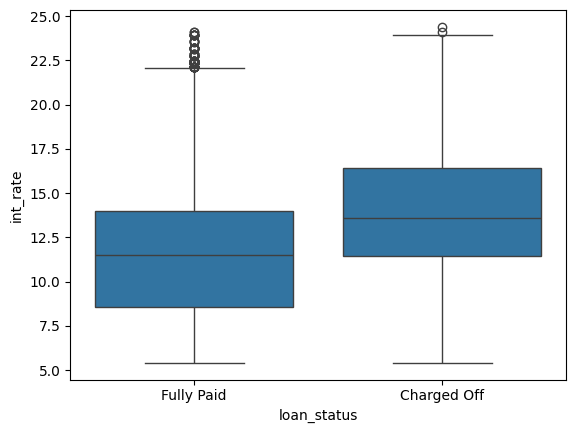

In [60]:
sns.boxplot(loan_df,y='int_rate',x='loan_status')
pyplot.show()

<p><font color='blue' size=4><b><u>Observation: </u></b>
The charged off loan has higher distribution of interest in the interquartile range. 
Even the 25th percentile of interest rate in charged off loans are greater than the median of Fully paid loans</font></p>

<p><font color='blue' size=4> <b>II. <u>Aim :</u></b>
    To Analyse the influence of term variable on target variable loan_status</font></p>

In [61]:
loan_df.pivot_table(index='loan_status',values='term',aggfunc=lambda x:np.quantile(x,.75))

,term
loan_status,
Charged Off,60.0
Fully Paid,36.0


In [62]:
loan_df.pivot_table(index='loan_status',values='term',aggfunc=lambda x:np.quantile(x,.57))

,term
loan_status,
Charged Off,60.0
Fully Paid,36.0


In [63]:
loan_df[loan_df['loan_status'] == 'Charged Off'].term.value_counts()

term
36    3065
60    2327
Name: count, dtype: int64

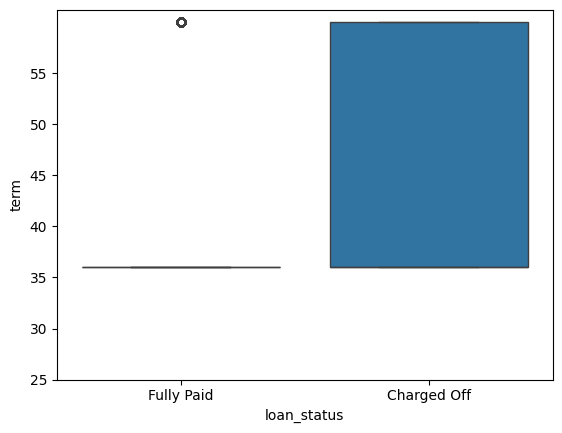

In [64]:
sns.boxplot(loan_df,y='term',x='loan_status')
labels=[x for x in range(25,60,5)]
pyplot.yticks(ticks=labels,labels=labels)
pyplot.show()

<p><font color='blue' size=4><b><u>Observation: </u></b>
As you can see from the pivot and boxplot till 75th percentile all loans are short term loans which are fully repaid
where as 43% of charged off loans are long term loans of 60 month. </font></p>

<p><font color='blue' size=4> <b>III. <u>Aim :</u></b>
    To Understand the influence & distribution of loan amount variable on target variable loan_status</font></p>

In [65]:
loan_df[['loan_amnt','funded_amnt','funded_amnt_inv']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv
count,37500.000000,37500.000000,37500.000000
mean,11126.065333,10859.756667,10297.793603
std,7355.422183,7097.481056,7028.488630
min,500.000000,500.000000,0.000000
25%,5500.000000,5400.000000,5000.000000
50%,10000.000000,9600.000000,8875.000000
75%,15000.000000,15000.000000,14106.994025
max,35000.000000,35000.000000,35000.000000


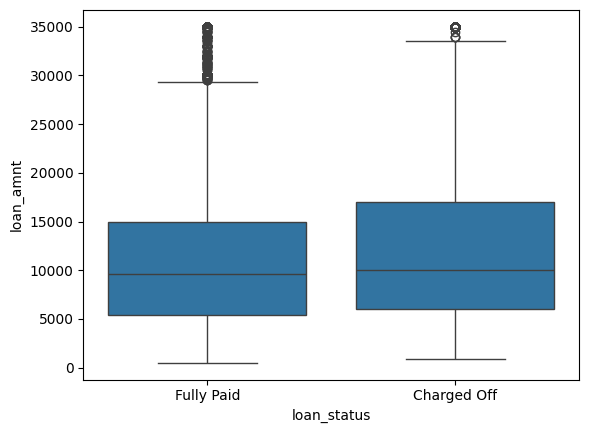

In [66]:
sns.boxplot(loan_df,y='loan_amnt',x='loan_status')
pyplot.show()

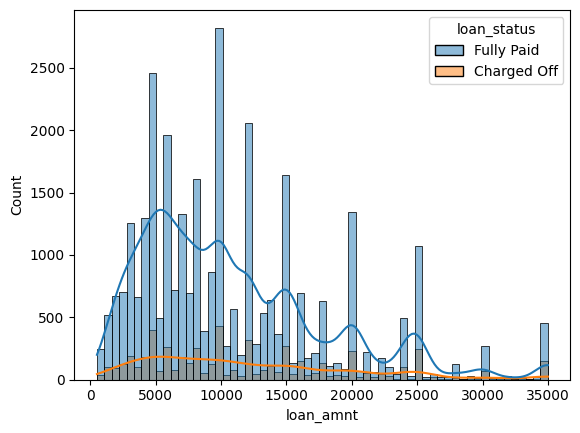

In [67]:
sns.histplot(loan_df,x='loan_amnt',kde=True,hue='loan_status')
pyplot.show()

<p><font color='blue' size=4> <b><u>Observation :</u></b>
    As seen in the boxplot , there are no major difference in the loan amount w.r.t to both fully_paid vs charged off loans. The distribution in 25th and 50th percentile seems to be same apart from a slight increase in the loan amount for the charged off loans in the 75th percentile. Also the distribution shows no difference in both the status apart from higher concentration of 5k-15k loan amount in fully paid loans where as the charged off loans are more or less equally distributed till 20k</font></p>

<p><font color='blue' size=4> <b>IV. <u>Aim :</u></b>
    To Understand the influence of annual income on target variable loan_status</font></p>

In [68]:
loan_df['annual_inc'].value_counts()

annual_inc
60000.0    1434
50000.0    1009
40000.0     837
45000.0     792
30000.0     774
           ... 
80140.0       1
29412.0       1
27138.0       1
26458.0       1
57100.0       1
Name: count, Length: 5005, dtype: int64

In [69]:
loan_df['annual_inc_in_lakhs']=loan_df['annual_inc'].apply(lambda x:round(x/100000,2))

In [70]:
loan_df['annual_inc_in_lakhs'].describe()

count    37500.000000
mean         0.693495
std          0.646710
min          0.040000
25%          0.410000
50%          0.600000
75%          0.830000
max         60.000000
Name: annual_inc_in_lakhs, dtype: float64

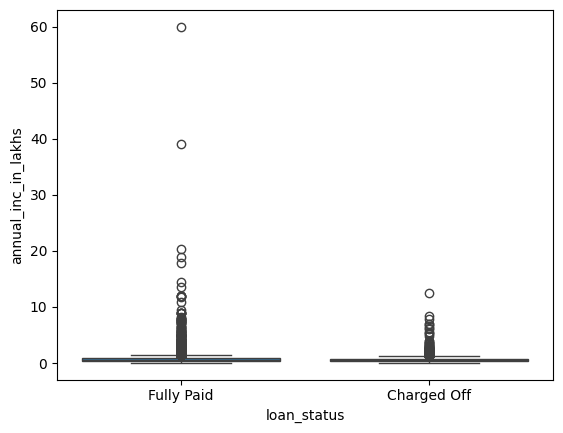

In [71]:
sns.boxplot(loan_df,y='annual_inc_in_lakhs',x='loan_status')
pyplot.show()

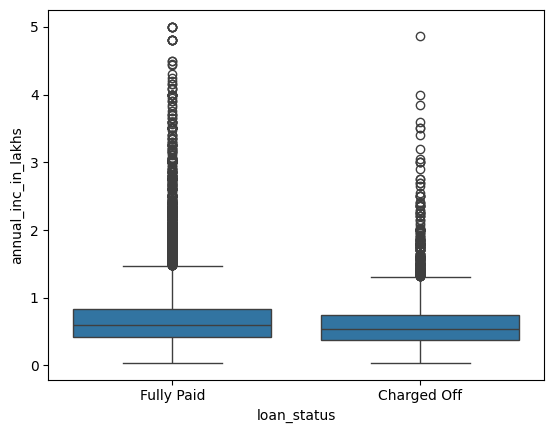

In [72]:
sns.boxplot(loan_df[loan_df['annual_inc_in_lakhs']<=5],y='annual_inc_in_lakhs',x='loan_status')
pyplot.show()

In [73]:
loan_df.pivot_table(index='loan_status',values='annual_inc_in_lakhs',aggfunc=lambda x:np.quantile(x,.75))

,annual_inc_in_lakhs
loan_status,
Charged Off,0.75
Fully Paid,0.85


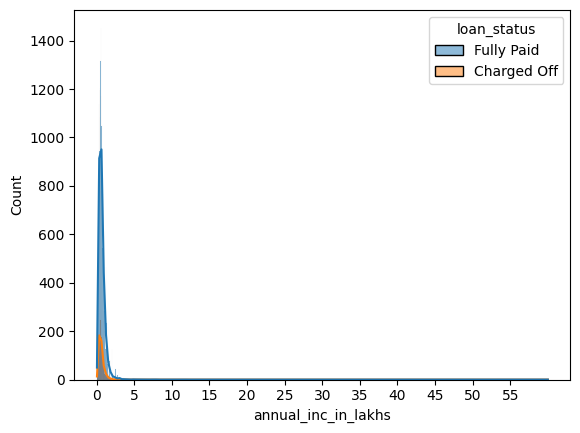

In [74]:
sns.histplot(loan_df,x='annual_inc_in_lakhs',hue='loan_status',kde=True)
labels=[x for x in range(0,60,5)]
pyplot.xticks(ticks=labels,labels=labels)
pyplot.show()

<p><font color='blue' size=4> <b><u>Observation :</u></b>
The Annual Income is distributed less than 1L in the IQR range around 40 to 80K, the IQR is almost same between Fully Paid and Charged Off Loans.
The are outliers beyond the upper whisker in both the cases. Even the annual income with > 10L are charged off
</font></p>

<p><font color='blue' size=4> <b>V. <u>Aim :</u></b>
    To Understand the influence of Debt to Income on target variable loan_status</font></p>

In [75]:
loan_df['dti'].describe()

count    37500.000000
mean        13.295236
std          6.658049
min          0.000000
25%          8.170000
50%         13.390000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

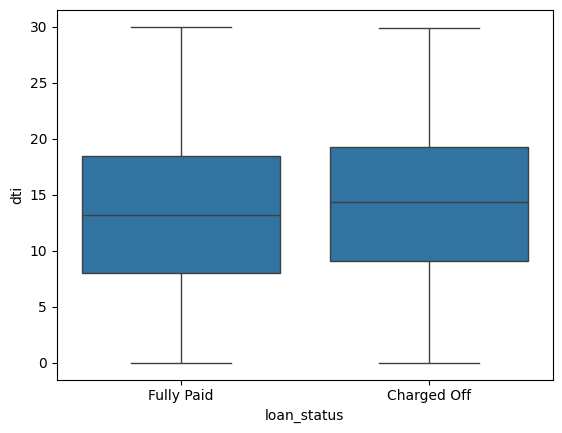

In [76]:
sns.boxplot(loan_df,y='dti',x='loan_status')
pyplot.show()

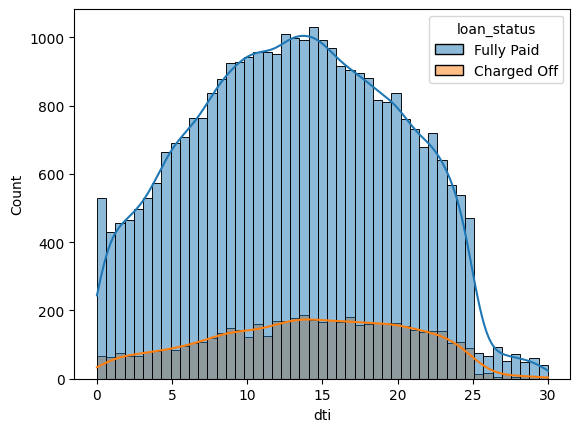

In [77]:
sns.histplot(loan_df,x='dti',hue='loan_status',kde=True)
pyplot.show()

In [78]:
loan_df.pivot_table(index='loan_status',values='dti',aggfunc=lambda x:np.quantile(x,.75))

,dti
loan_status,
Charged Off,19.27
Fully Paid,18.42


In [79]:
loan_df.pivot_table(index='loan_status',values='dti',aggfunc=lambda x:np.quantile(x,.25))

,dti
loan_status,
Charged Off,9.0575
Fully Paid,8.0300


<p><font color='blue' size=4> <b><u>Observation :</u></b>
We are seeing overall peak in the histogram near 15 indicating most of the customers have 15:1 dti ratio.
The 25th percentile and 75th percentile of charged off loans are slightly higher w.r.t dti. Observe the long tail towards the higher dtis for the charged off loans. More the dti , the chances of loans getting charged off are high.
</font></p>

<p><font color='blue' size=4> <b>VI. <u>Aim :</u></b>
    To Understand the influence of number of credit inquiries on target variable loan_status</font></p>

In [80]:
loan_df['inq_last_6mths'].describe()

count    37500.000000
mean         0.872427
std          1.070935
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64

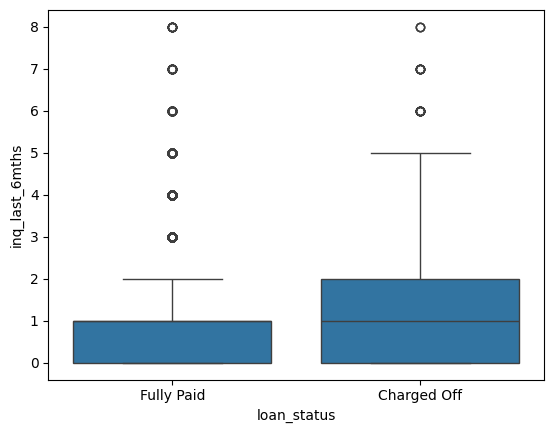

In [81]:
sns.boxplot(loan_df,y='inq_last_6mths',x='loan_status')
pyplot.show()

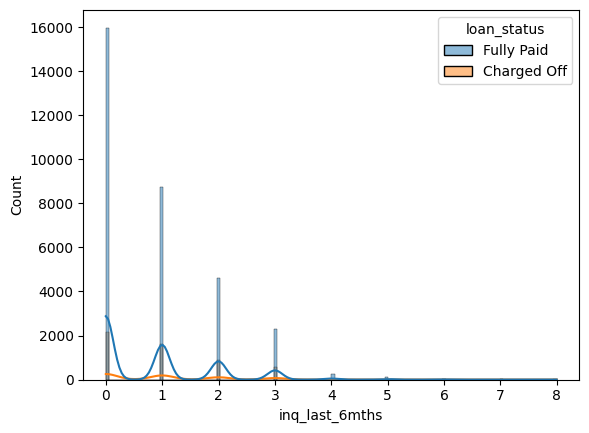

In [82]:
sns.histplot(loan_df,x='inq_last_6mths',hue='loan_status',kde=True)
pyplot.show()

In [83]:
pivot_25=loan_df.pivot_table(index='loan_status',values='inq_last_6mths',aggfunc=lambda x:np.quantile(x,.25))
pivot_75=loan_df.pivot_table(index='loan_status',values='inq_last_6mths',aggfunc=lambda x:np.quantile(x,.75))
pivot_90=loan_df.pivot_table(index='loan_status',values='inq_last_6mths',aggfunc=lambda x:np.quantile(x,.90))

In [84]:
pivoted_percentiles=pivot_25.merge(pivot_75,on='loan_status',how='left').merge(pivot_90,on='loan_status',how='left')
pivoted_percentiles.rename(columns={'inq_last_6mths_x':'25%','inq_last_6mths_y':'75%','inq_last_6mths':'90%'},inplace=True)

In [85]:
pivoted_percentiles

,25%,75%,90%
loan_status,,,
Charged Off,0.0,2.0,3.0
Fully Paid,0.0,1.0,2.0


<p><font color='blue' size=4> <b><u>Observation :</u></b>
Beyond 50th percentile the number of inquiries made by customers whose loans are charged off customers keeps increasing,and the upper whisker goes up to 5 inquiries in 6 months ,which is an early indicator to forsee the customer might default 
</font></p>

<p><font color='blue' size=4> <b>VII. <u>Aim :</u></b>
    To Understand the influence of number of credit lines in credit file over target variable loan_status</font></p>

In [86]:
loan_df['total_acc'].describe()

count    37500.000000
mean        22.088240
std         11.414941
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

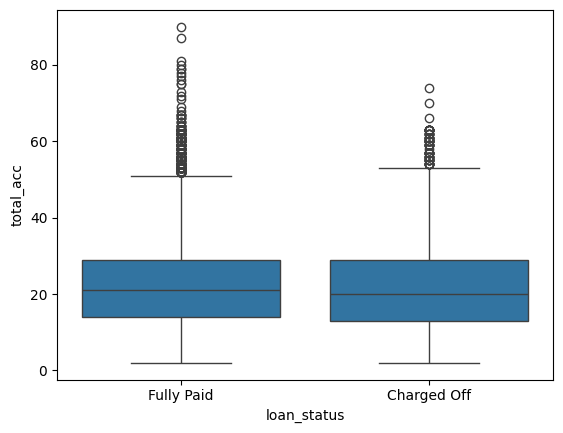

In [87]:
sns.boxplot(loan_df,y='total_acc',x='loan_status')
pyplot.show()

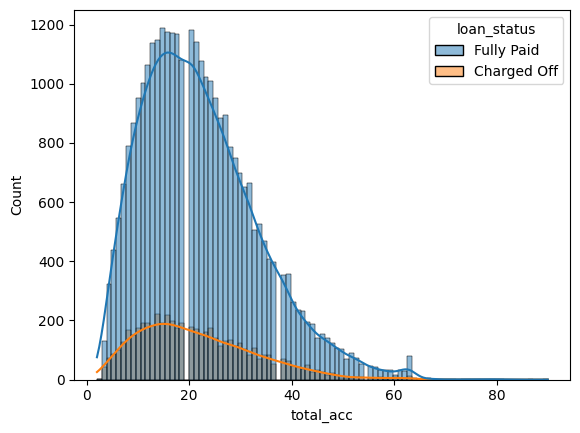

In [88]:
sns.histplot(loan_df,x='total_acc',hue='loan_status',kde=True)
pyplot.show()

<p><font color='blue' size=4> <b><u>Observation :</u></b>
No Significant influence observed , as the 25th, 75th and median lies more or less same for both paid and defaulted loans
</font></p>

<p><font color='purple' size=4> <b><u>Summarizing Univariate Analysis on Numerical Columns :</u></b>
    <ul>
<li> The charged off loans are having Literally higher interest rates compared to that of Fully Paid Ones </li>
<li> The tenure of Charged Off variables are spreading to 60 months whereas all fully Paid loans are with 36 month tenure </li>
<li> The charged off loan amounts are predominantly distributed in the left of histplot in the range of 5- 15k. </li>
<li> The annual income of charged off loans are almost 10K Dollars less than the Fully paid counterparts in the 75th Quartile </li>
<li> The income range is seen to be somewhere in the 40k - 80k Dollars for the customers in the 75th quartile and even in the upper whisker it is less than 2L Dollars </li>
<li> There are also extreme outliers in the dataset for annual income beyond upper whisker extending upto 60L $ </li>
<li> The debt to income ratio falls somewhere just below 15 as seen in the box and histplot </li>
<li> The dti ratio for the charged off loans seem to be higher almost 1 base points above Fully Paid Loans </li>
<li> The number of credit inquiries on the 75th quartile is 2 for charged off loans and keeps moving till 5 in the upper whisker in last six months </li>
</ul>
</font></p>

<h3><font color='brown' size=4>2. Categorical Variables<font></h3>

<p><font color='blue' size=4> <b>I. <u>Aim :</u></b>
    To Understand the influence of property ownership on target variable loan_status</font></p>

In [89]:
pivot_ownership=loan_df.pivot_table(index='home_ownership',columns='loan_status',values='member_id',aggfunc='count')
pivot_ownership['total']=pivot_ownership.sum(axis=1)
pivot_ownership['% of loans charged off'] = (100*pivot_ownership['Charged Off'])/pivot_ownership['total']
pivot_ownership.dropna(inplace=True)

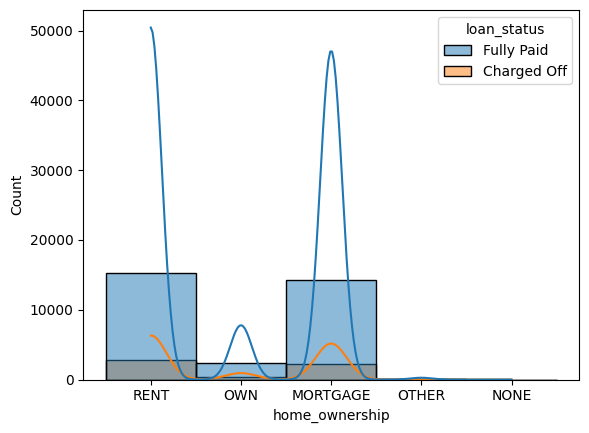

In [90]:
sns.histplot(loan_df,x='home_ownership',hue='loan_status',kde=True)
pyplot.show()

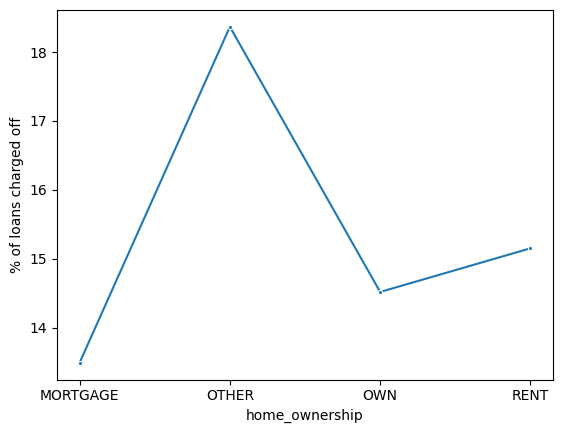

In [91]:
sns.lineplot(pivot_ownership,x='home_ownership',y='% of loans charged off',marker='.')
pyplot.show()

<p><font color='blue' size=4> <b><u>Observation :</u></b>
Customer who stays in rented houses and whose houses are mortgaged seems to default more than customers with own houses.
However the ratio of charged off to fullypaid seems to be higher in the OTHERs section.
</font></p>

<p><font color='blue' size=4> <b>II. <u>Aim :</u></b>
    To Understand the influence of purpose of loan on target variable loan_status</font></p>

In [92]:
pivot_purpose=loan_df.pivot_table(index='purpose',columns='loan_status',values='member_id',aggfunc='count')
pivot_purpose['total']=pivot_purpose.sum(axis=1)
pivot_purpose['% of loans charged off'] = (100*pivot_purpose['Charged Off'])/pivot_purpose['total']
pivot_purpose.sort_values(by='total',ascending=False,inplace=True)
pivot_purpose.head(10)

loan_status,Charged Off,Fully Paid,total,% of loans charged off
purpose,,,,
debt_consolidation,2678,14993,17671,15.154773
credit_card,509,4376,4885,10.419652
other,599,3113,3712,16.136853
home_improvement,328,2448,2776,11.815562
major_purchase,210,1870,2080,10.096154
small_business,458,1245,1703,26.893717
car,155,1293,1448,10.704420
wedding,91,821,912,9.978070
medical,100,556,656,15.243902


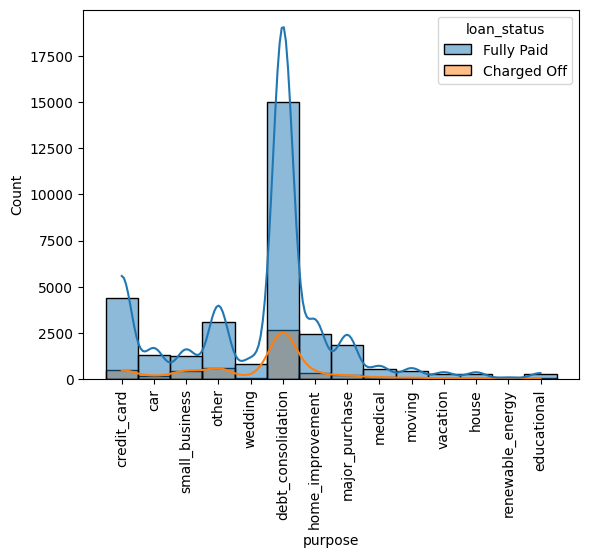

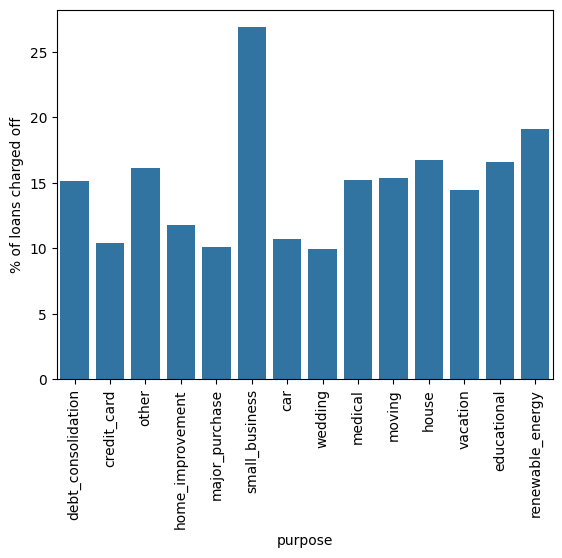

In [93]:
sns.histplot(loan_df,x='purpose',hue='loan_status',kde=True)
pyplot.xticks(rotation=90)
pyplot.show()
sns.barplot(pivot_purpose,x='purpose',y='% of loans charged off')
pyplot.xticks(rotation=90)
pyplot.show()


<p><font color='blue' size=4> <b><u>Observation :</u></b>
Debt_consolidation loans are unusually high. The charged off loans are also high in this segment
The default ratio are high in 'small business' Segment . It is as high as 1 for ever 26 loans    
</font></p>

<p><font color='blue' size=4> <b>III. <u>Aim :</u></b>
    To Understand the influence of employment length of loan on target variable loan_status</font></p>

In [94]:
loan_df.pivot_table(index='emp_length',columns='loan_status',values='member_id',aggfunc='count')

loan_status,Charged Off,Fully Paid
emp_length,,
1 year,454,2703
10+ years,1330,7153
2 years,565,3719
3 years,555,3449
4 years,460,2876
5 years,457,2734
6 years,306,1860
7 years,263,1444
8 years,203,1230


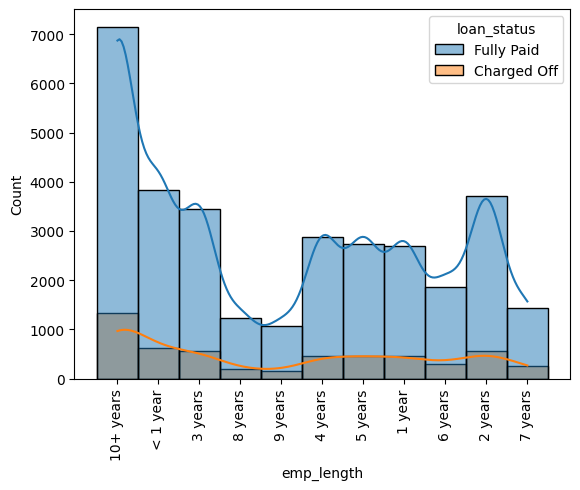

In [95]:
sns.histplot(loan_df,x='emp_length',hue='loan_status',kde=True)
pyplot.xticks(rotation=90)
pyplot.show()

<p><font color='blue' size=4> <b><u>Observation :</u></b>
The charged off loans are high for the employees with experience of 10+ years
</font></p>

<p><font color='blue' size=4> <b>IV. <u>Aim :</u></b>
    To Understand the influence of address_state of loan on target variable loan_status</font></p>

In [96]:
pivot_state=loan_df.pivot_table(index='addr_state',columns='loan_status',values='member_id',aggfunc='count')
pivot_state['total']=pivot_state.sum(axis=1)
pivot_state['% of loan charged off'] = (100 * pivot_state['Charged Off'])/pivot_state['total']
pivot_state.dropna(inplace=True)
pivot_state_head=pivot_state.sort_values(by='total',ascending=False).head(10).sort_values(by='% of loan charged off',ascending=False)
pivot_state_head

loan_status,Charged Off,Fully Paid,total,% of loan charged off
addr_state,,,,
FL,480.0,2208.0,2688.0,17.857143
CA,1075.0,5699.0,6774.0,15.869501
GA,208.0,1109.0,1317.0,15.793470
NJ,276.0,1490.0,1766.0,15.628539
IL,193.0,1249.0,1442.0,13.384189
NY,478.0,3115.0,3593.0,13.303646
VA,171.0,1164.0,1335.0,12.808989
MA,150.0,1104.0,1254.0,11.961722
TX,310.0,2297.0,2607.0,11.891063


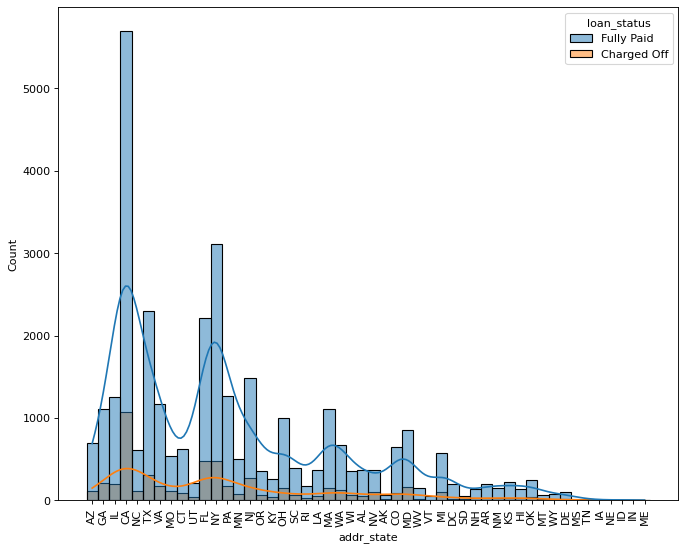

In [97]:
pyplot.figure(figsize=(10,8),dpi=80)
sns.histplot(loan_df,x='addr_state',hue='loan_status',kde=True)
pyplot.xticks(rotation=90)
pyplot.show()

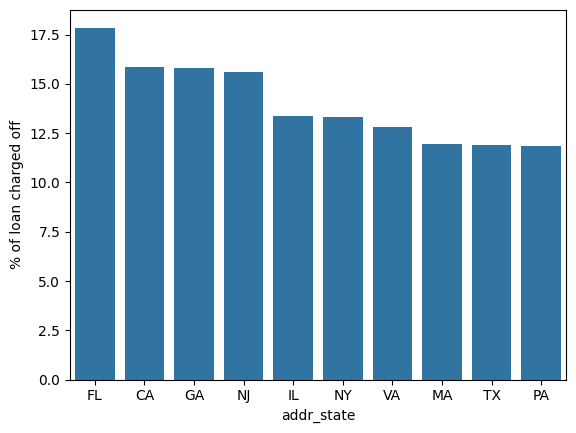

In [98]:
sns.barplot(pivot_state_head,x='addr_state',y='% of loan charged off')
pyplot.show()

<p><font color='blue' size=4> <b><u>Observation :</u></b>
The peaks are seen in california, followed by Florida and Newyork.
The number are charged off loans are also high around those peaks. As a derived variable we tried to find out the % of charged off loans in each state which came out to be FL,CA,GA in decreasing order
</font></p>

<p><font color='blue' size=4> <b>V. <u>Aim :</u></b>
    To Understand the influence of Grade of loan on target variable loan_status</font></p>

In [99]:
pivot_grade=loan_df.pivot_table(index=['grade'],columns='loan_status',values='member_id',aggfunc='count')
pivot_grade['total']=pivot_grade['Charged Off'] + pivot_grade['Fully Paid']
pivot_grade ['% of loans charged off'] = (100*pivot_grade['Charged Off']) / pivot_grade['total']
pivot_grade

loan_status,Charged Off,Fully Paid,total,% of loans charged off
grade,,,,
A,560,9080,9640,5.809129
B,1356,10001,11357,11.939773
C,1286,6373,7659,16.790704
D,1084,3893,4977,21.780189
E,697,1918,2615,26.653920
F,309,645,954,32.389937
G,100,198,298,33.557047


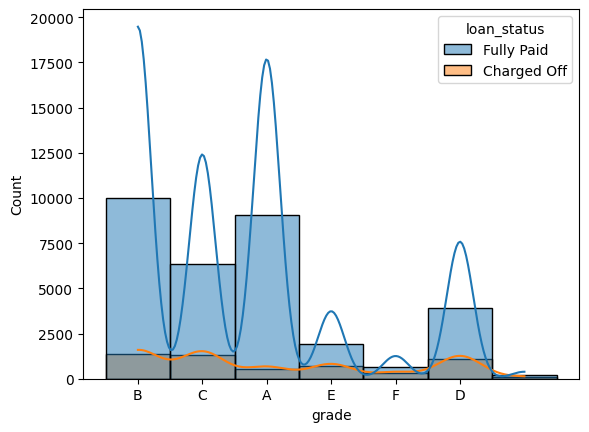

In [100]:
sns.histplot(loan_df,x='grade',hue='loan_status',kde=True)
pyplot.xticks(ticks=['A','B','C','D','E','F'],labels=['A','B','C','D','E','F'])
pyplot.show()

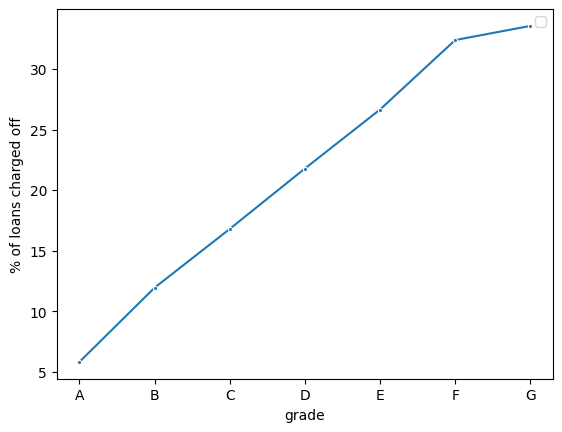

In [101]:
sns.lineplot(pivot_grade,x='grade',y='% of loans charged off',marker='.')
pyplot.legend()
pyplot.show()

<p><font color='blue' size=4> <b><u>Observation :</u></b>
The charged off loans are mostly distributed across B, C and D grades which indicates higher risk score indicates higher defaults
Also the number of charged off loans are high as the grade decreases. This is observed from the derived variable % of charged loan in each Grade in the line plot above
</font></p>

<p><font color='purple' size=4> <b><u>Summary of Univariate Categorical Analysis :</u></b>
<ul>
<li>The customers in RENT and mortgage category seem to default more than the houses owned</li>
<li>The Charged off % in Other category seem to be high compared to that of other segments</li>
<li>The Loan purpose segments shows highers sanctions on debt consolidation loans, followed by credit cards</li>
<li>The Small Business segments seems to have higher charged off ratios compared to that of remaining loans which is above 25%</li>
<li>The Employment Length of 10 and above seems to have higher loans ( 7000 Loans ), contributing higher % of charge offs </li>
<li>The trend is followed in 2,3,4,5 length of employment length, with increased contribution towards charge off</li>
<li>Surprisingly employment with years 8 & 9 contribute to less number of loans</li>
<li>Out of all states CA (California) has the highest number of loans,followed by NY and FL</li>
<li>FL (Florida) has highest percentage of charging off loans, followed by CA and GA</li>
<li>The Charged off loans are getting increased in % as the grade goes down</li>
</ul>
</font>
</p>

<h3><font color='brown' size=5>Segmented Univariate Analysis<font></h3>

<p><font color='blue' size=4> <b><u>Aim :</u></b>
    To Understand how customers segmented by annual income influence the loan status</font></p>

<p><font color='blue' size=4> 
    We are doing a quantile cut of annual income column in 5 income ranges below and creating a new segmented column</font></p>

In [102]:
loan_df['Income Grade']=pd.qcut(loan_df['annual_inc_in_lakhs'],5,labels=['Lower','Lower Middle','Middle','Upper Middle','Upper'])

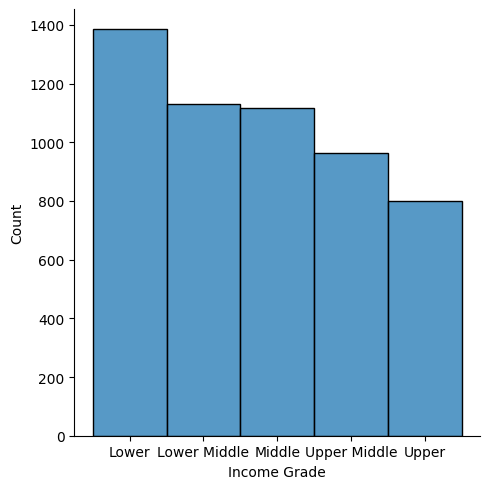

In [103]:
sns.displot(loan_df[['Income Grade','loan_status']][loan_df['loan_status']=='Charged Off'],x='Income Grade')
pyplot.show()

<p><font color='blue' size=4> <b><u>Observation :</u></b>
    As seen in the above histplot, the number of charged off loans are very high in the low income group where as it is less in the high income groups</font></p>

<h3><font color='brown' size=5>Derivative Analysis<font></h3>

<p><font color='blue' size=4><b><u>Aim :</u></b> To Analyse the Loan Issue date</font></p>

<p><font color='blue' size=4> We have created a new column deriving months from Issue date </p>

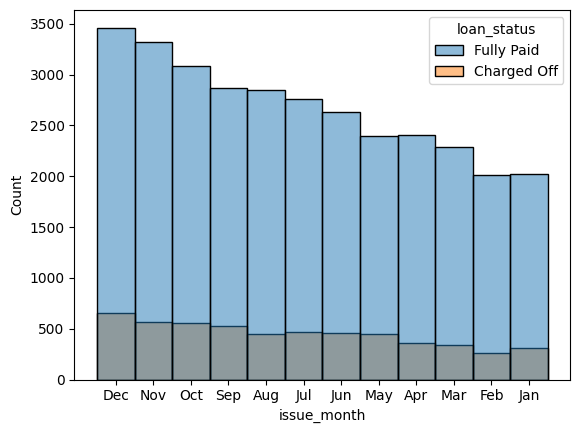

In [104]:
sns.histplot(loan_df[['issue_month','loan_status']],x='issue_month',hue='loan_status')
pyplot.show()

<p><font color='blue' size=4><b><u>Observation :</u></b>As seen in the above histplot, December and November are the months with high number of loan issues , This might be aligned with the thanksgiving and christmas holidays. </font></p>

<p><font color='purple' size=4> 
<b><u>Summary of Segmented Univariate Analysis :</u></b>
<ul>
<li>The monthwise analysis of 'Issue date' shows most of the loans are being issued in Dec, November during US holidays</li>
<li>The charged off loans are high with Income cadre 'Lower'</li>  
</ul>
</font>
</p>

<h3><font color='brown' size=5>Bivariate Analysis<font></h3>

<p>
<font color='blue' size=4>
    We will be doing bivariate analysis 
    <ul>
          <li>1. Correlation between Numerical variables  
            <ul>   
              <li>The correlation between annual income and debt to income and the impact on loan status</li>
              <li>The correlation between loan amount and interest rate and the impact on loan status</li>  
              <li>The correlation between annual income and loan amount and the impact on loan status</li>
            <ul>   
          </li>
          <li>2. Categorical variables and its effect on the loan_status
             <ul>
               <li>The impact of states with its annual income on loan status</li>
               <li>The impact of loan purposes with customers annual income on loan status</li>
               <li>The impact of loan purposes with customers dti on loan status</li>
               <li>The impact of revolving utilization,revolving balance on the credit card loans</li>
               <li>The impact of income grade w.r.t employee length on loan status</li>
               <li>The impact of dti w.r.t employee length on loan status</li> 
               <li>The impact of home_ownership w.r.t employee length</li>
               <li>The impact of loan_purposes w.r.t employee length</li>
             </ul>
          </li>
    </ul>    
</font>
</p>

In [105]:
loan_df['int_rate_desc']=pd.qcut(loan_df['int_rate'],5,labels=['Very Less','Less','Moderate','High','Very High'])
loan_df['loan_amnt_desc']=pd.qcut(loan_df['loan_amnt'],5,labels=['Very Less','Less','Moderate','High','Very High'])


<p><font color='blue' size=4> <b><u>Aim :</u></b>
    To Understand the correlation between annual_inc_in_lakhs of loan and debt to income</font></p>

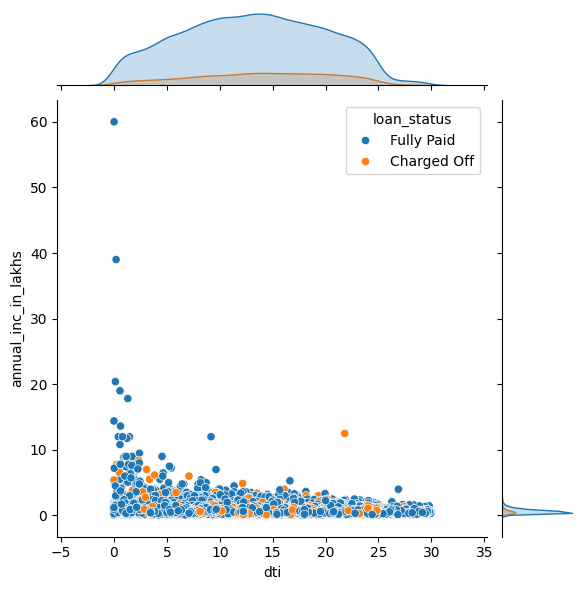

In [106]:
sns.jointplot(loan_df[['dti','annual_inc_in_lakhs','loan_status']],x='dti',y='annual_inc_in_lakhs',hue='loan_status',kind='scatter')
pyplot.show()

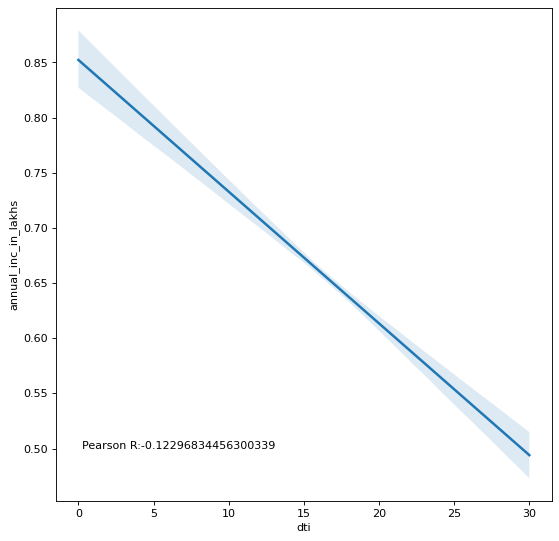

In [107]:
import scipy.stats as stats

pyplot.figure(figsize=(8,8),dpi=80)
pearson_coeff=stats.pearsonr(loan_df['dti'], loan_df['annual_inc_in_lakhs'])
sns.regplot(loan_df[['dti','annual_inc_in_lakhs']],x='dti',y='annual_inc_in_lakhs',scatter=False)
pyplot.text(0.25,0.5,(':').join(('Pearson R',str(pearson_coeff[0]))))
pyplot.show()

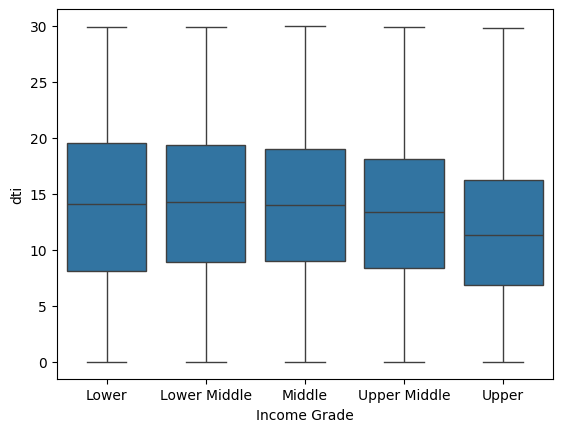

In [108]:
sns.boxplot(loan_df[['Income Grade','dti']],x='Income Grade',y='dti')
pyplot.show()

<p><font color='blue' size=4> <b><u>Observation :</u></b>
<li>The Regression line has a negative slope indicating and negative pearson coefficient indicating there is a negative correlation between two variables</li>
<li> As the box plot with derived variable Income Grade shows the dti decreases w.r.t towards the right of x axis as Income class move towards Upper</li>
</font></p>

<p><font color='blue' size=4> <b><u>Aim :</u></b>
    To Understand the correlation between annual_inc_in_lakhs of loan and loan_amount</font></p>

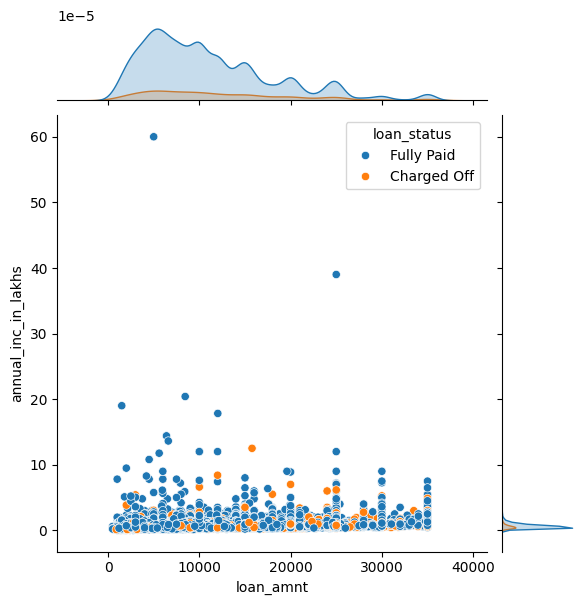

In [109]:
sns.jointplot(loan_df[['loan_amnt','annual_inc_in_lakhs','loan_status']],x='loan_amnt',y='annual_inc_in_lakhs',hue='loan_status',kind='scatter')
pyplot.show()

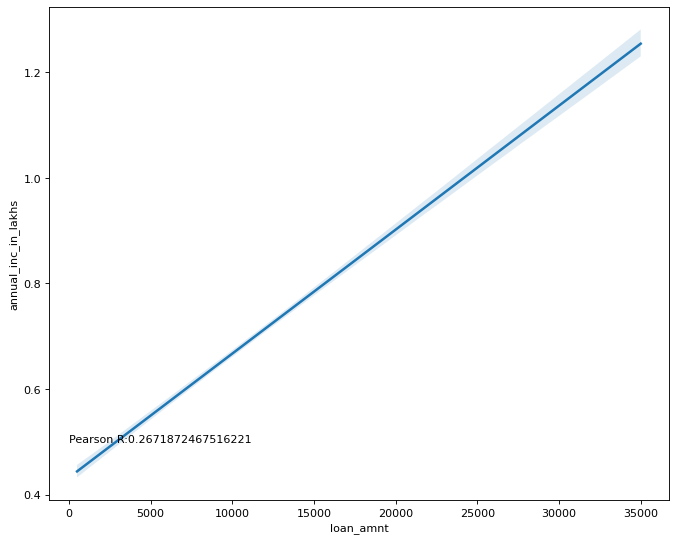

In [110]:
pyplot.figure(figsize=(10,8),dpi=80)
sns.regplot(loan_df,x='loan_amnt',y='annual_inc_in_lakhs',scatter=False)
pearson_coeff=stats.pearsonr(loan_df['loan_amnt'], loan_df['annual_inc_in_lakhs'])
pyplot.text(0.25,0.5,(':').join(('Pearson R',str(pearson_coeff[0]))))
pyplot.show()

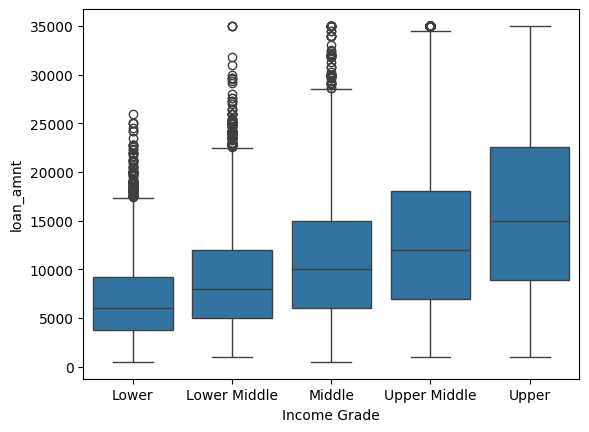

In [111]:
sns.boxplot(loan_df[['Income Grade','loan_amnt']],x='Income Grade',y='loan_amnt')
pyplot.show()

In [112]:
loan_df['loan_amnt_desc']

0        Very Less
1        Very Less
2        Very Less
3         Moderate
5        Very Less
           ...    
39661    Very Less
39662    Very Less
39663    Very Less
39664    Very Less
39665    Very Less
Name: loan_amnt_desc, Length: 37500, dtype: category
Categories (5, object): ['Very Less' < 'Less' < 'Moderate' < 'High' < 'Very High']

In [113]:
low_income_grade=loan_df[['Income Grade','loan_amnt','loan_amnt_desc','int_rate','loan_status']][(loan_df['Income Grade']=='Lower') & (loan_df['loan_amnt_desc']=='Very High')]
low_income_grade[['loan_amnt','int_rate']].describe(),low_income_grade['loan_status'].value_counts()

(          loan_amnt    int_rate
 count    197.000000  197.000000
 mean   18796.573604   13.130305
 std     2003.583603    3.598601
 min    16200.000000    6.170000
 25%    17475.000000   10.710000
 50%    18225.000000   12.610000
 75%    20000.000000   15.580000
 max    26000.000000   22.480000,
 loan_status
 Fully Paid     138
 Charged Off     59
 Name: count, dtype: int64)

<p><font color='blue' size=4> <b><u>Observation :</u></b>
<li>The Regression line has a positive slope however showing less than 0.3 indicating a weak correlation between the two variables</li>
<li>The spread is increasing and the 25th and 75th percetiles shows upward trend w.r.t Income Categories  
<li> There are more outliers in the Lower , Lower Middle and Middle  Income Segments with around 30% being charged off
</font></p></li>

<p><font color='blue' size=4> <b><u>Aim :</u></b>
    To Understand whether any correlation exists between interest rate and loan amount and analyse the impact on loan defaults</font></p>

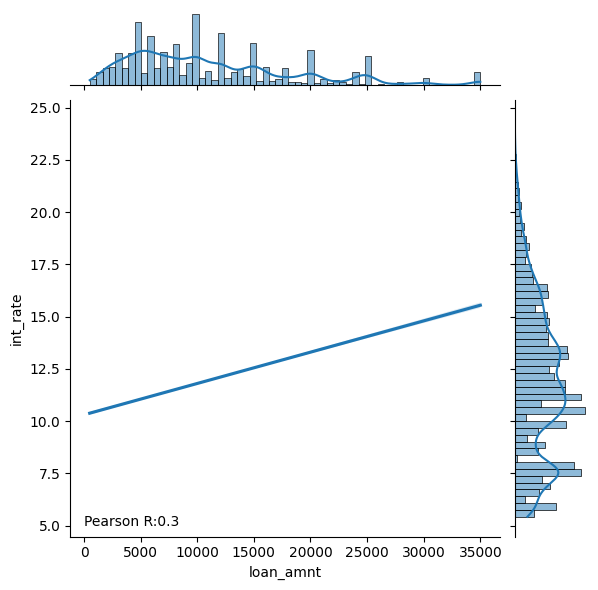

In [114]:
sns.jointplot(loan_df[['int_rate','loan_amnt','loan_status']],x='loan_amnt',y='int_rate',kind='reg',scatter=False)
pearson_coeff=stats.pearsonr(loan_df['int_rate'], loan_df['loan_amnt'])
pyplot.text(10.5,5,(":").join(('Pearson R',str(round(pearson_coeff[0],2)))))
pyplot.show()

<font color='blue' size=3> <b>Note:</b> We are taking quantile cuts of interest rate and loan amount to analyse the influence  of these columns on defaults </font>

In [115]:
pivot_int_rate=loan_df[['int_rate_desc','loan_amnt','loan_status','annual_inc_in_lakhs','loan_amnt_desc','loan_id']].pivot_table(index=['int_rate_desc'],values=['loan_id'],columns=['loan_amnt_desc','loan_status'],aggfunc='count')
pivot_int_rate

loan_id                                                \
loan_amnt_desc   Very Less                   Less               Moderate   
loan_status    Charged Off Fully Paid Charged Off Fully Paid Charged Off   
int_rate_desc                                                              
Very Less              138       2176         101       1810          69   
Less                   234       1840         169       1673         153   
Moderate               241       1404         189       1147         149   
High                   319       1594         238       1172         201   
Very High              284        793         226        728         221   

                                                                         
loan_amnt_desc                   High              Very High             
loan_status    Fully Paid Charged Off Fully Paid Charged Off Fully Paid  
int_rate_desc                                                            
Very Less            1452          60       1251          23        573  
Less                 1260         144       1390         105       1073  
Moderate              931         202       1258         220       1238  
High                  971         251       1216         270       1271  
Very High             716         411       1256         774       1915

In [116]:
very_less_loan_amnt=pivot_int_rate.iloc[:,[0,1]]
charged_off_percentages=pd.DataFrame({});
charged_off_percentages['% Charged Off (Very Less Loan Amount)']=(100 * very_less_loan_amnt['loan_id']['Very Less']['Charged Off'])/very_less_loan_amnt['loan_id']['Very Less'].sum(axis=1)
print(very_less_loan_amnt)
charged_off_percentages

                   loan_id           
loan_amnt_desc   Very Less           
loan_status    Charged Off Fully Paid
int_rate_desc                        
Very Less              138       2176
Less                   234       1840
Moderate               241       1404
High                   319       1594
Very High              284        793


,% Charged Off (Very Less Loan Amount)
int_rate_desc,
Very Less,5.963699
Less,11.282546
Moderate,14.650456
High,16.675379
Very High,26.369545


In [117]:
moderate_loan_amnt=pivot_int_rate.iloc[:,[4,5]]
charged_off_percentages=pd.DataFrame({});
charged_off_percentages['% Charged Off (Moderate Loan Amount)']=(100 * moderate_loan_amnt['loan_id']['Moderate']['Charged Off'])/moderate_loan_amnt['loan_id']['Moderate'].sum(axis=1)
charged_off_percentages

,% Charged Off (Moderate Loan Amount)
int_rate_desc,
Very Less,4.536489
Less,10.828025
Moderate,13.796296
High,17.150171
Very High,23.585912


In [118]:
very_high_loan_amnt=pivot_int_rate.iloc[:,[8,9]]
charged_off_percentages=pd.DataFrame({});
charged_off_percentages['% Charged Off (Very High Loan Amount)']=(100 * very_high_loan_amnt['loan_id']['Very High']['Charged Off'])/very_high_loan_amnt['loan_id']['Very High'].sum(axis=1)
charged_off_percentages

,% Charged Off (Very High Loan Amount)
int_rate_desc,
Very Less,3.859060
Less,8.913413
Moderate,15.089163
High,17.521090
Very High,28.783935


In [119]:
loan_df[loan_df['int_rate_desc']=='Very High']['int_rate'].value_counts()

int_rate
16.77    288
15.99    252
16.49    212
15.65    205
18.25    201
        ... 
22.94      1
24.40      1
21.48      1
20.52      1
18.36      1
Name: count, Length: 152, dtype: int64

<p><font color='blue' size=4> <b><u>Observation :</u></b>
    <ul>
    <li>
        There is a positive slope observed in regression indicating the variables are correlated. The interest rate increases with the loan amount and lies between 10 and 15
    </li>
    <li>
     The % Loans getting charged off are increasing as the interest rate reaches towards higher end irrespective of the loan amount.
    </li>
    <ul>    
</font></p>

<p><font color='blue' size=4> <b><u>Aim :</u></b>
    To Understand whether income disparities in different states are having influence on loan defaults</font></p>

In [120]:
addr_df=loan_df[['annual_inc_in_lakhs','loan_status','addr_state']]
pivot_addr_25=addr_df[addr_df['addr_state'].isin(['CA','NY','FL','NJ','GA'])].pivot_table(index='addr_state',values=['annual_inc_in_lakhs'],columns=['loan_status'],aggfunc=lambda x:np.quantile(x,0.25))
pivot_addr_75=addr_df[addr_df['addr_state'].isin(['CA','NY','FL','NJ','GA'])].pivot_table(index='addr_state',values=['annual_inc_in_lakhs'],columns=['loan_status'],aggfunc=lambda x:np.quantile(x,0.75))
pivot_addr=pivot_addr_25.merge(pivot_addr_75,on='addr_state').rename(columns={'annual_inc_in_lakhs_x':'annual_inc_in_lakhs_25%','annual_inc_in_lakhs_y':'annual_inc_in_lakhs_75%'})
pivot_addr

annual_inc_in_lakhs_25%            annual_inc_in_lakhs_75%  \
loan_status             Charged Off Fully Paid             Charged Off   
addr_state                                                               
CA                           0.4000       0.44                  0.8000   
FL                           0.3500       0.40                  0.6825   
GA                           0.3675       0.44                  0.7300   
NJ                           0.4000       0.45                  0.7600   
NY                           0.4000       0.44                  0.8000   

                        
loan_status Fully Paid  
addr_state              
CA                0.89  
FL                0.80  
GA                0.85  
NJ                0.91  
NY                0.85

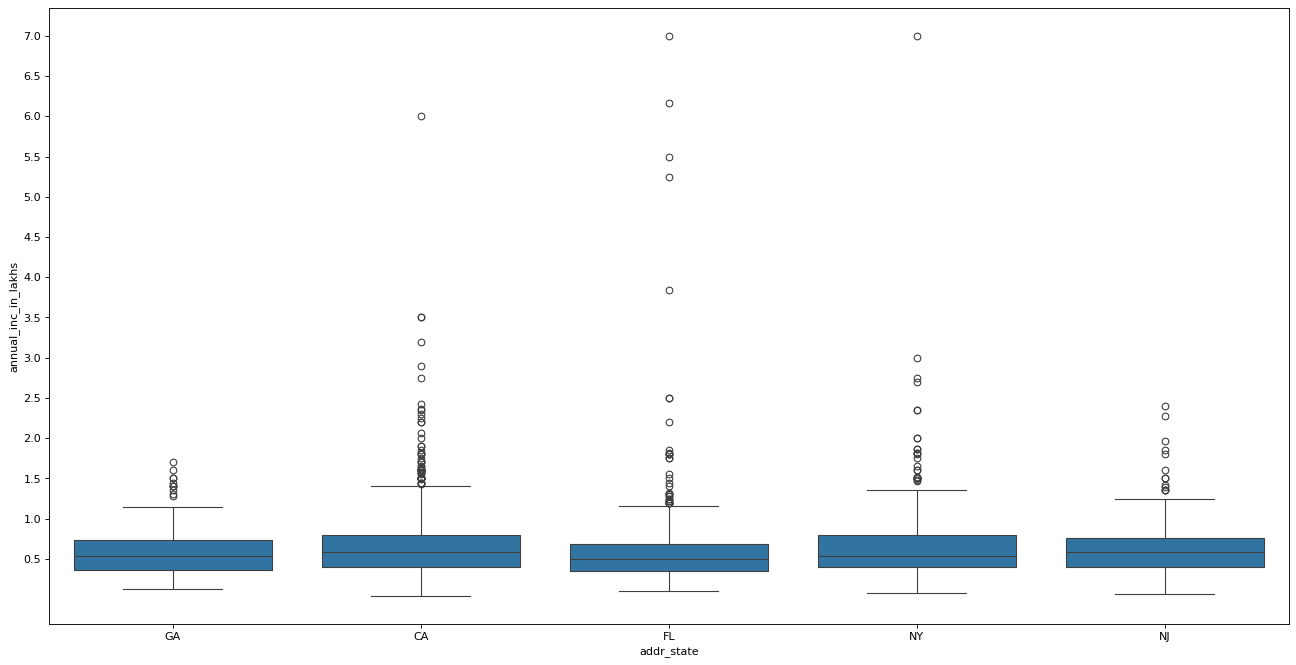

In [121]:
pyplot.figure(figsize=(20,10),dpi=80)
sns.boxplot(addr_df[(addr_df['addr_state'].isin(['CA','NY','FL','NJ','GA'])) & (addr_df['loan_status'] == 'Charged Off')],x='addr_state',y='annual_inc_in_lakhs')
pyplot.yticks(ticks=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7])
pyplot.show()

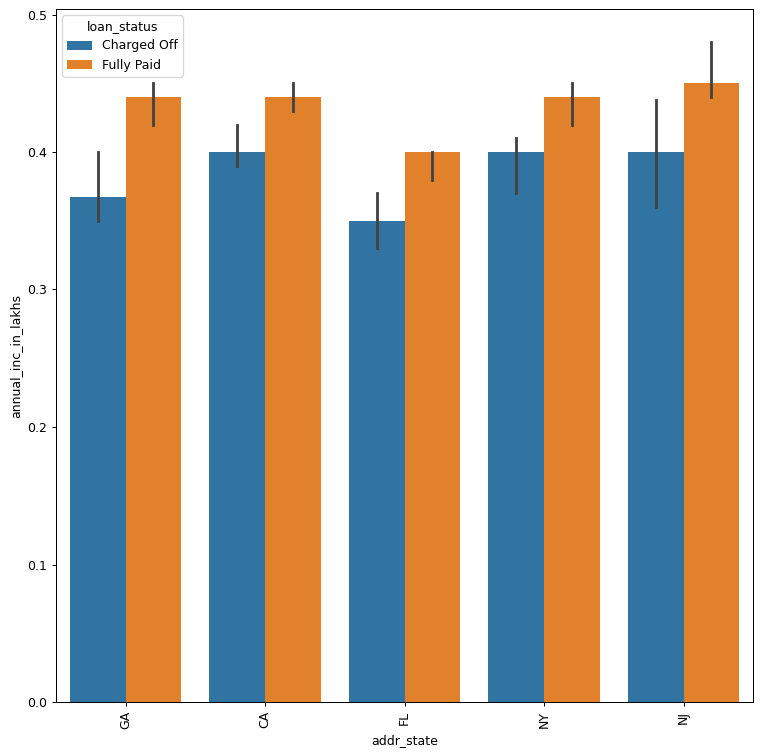

In [122]:
pyplot.figure(figsize=(10,10),dpi=90)
sns.barplot(addr_df[addr_df['addr_state'].isin(['CA','NY','FL','NJ','GA'])],x='addr_state',y='annual_inc_in_lakhs',hue='loan_status',estimator=lambda x:np.quantile(x,0.25))
pyplot.xticks(rotation=90)
pyplot.show()

<p><font color='blue' size=4> <b><u>Observation :</u></b>
<ul>    
<li>We have taken the states which showed high default ratios with respect to the total numbers of loans from univariate analysis</li>
<li>The Bivariate analysis was done analysing annual income on each of these states and the influence on the loan statuses</li>     
<li>We are seeing income disparities between top 5 states at the lower quartile range 25 
</li> 
</ul>    
</font></p>

<p><font color='blue' size=4> <b><u>Aim :</u></b>
    To Understand whether income disparities within loan purposes which are influencing the loan defaults</font></p>

In [123]:
purpose_df=loan_df[['annual_inc_in_lakhs','loan_status','purpose']]
pivot_purpose_25=purpose_df[purpose_df['purpose'].isin(['small_business','debt_consolidation','home_improvement','car','other','medical'])].pivot_table(index='purpose',values=['annual_inc_in_lakhs'],columns=['loan_status'],aggfunc=lambda x:np.quantile(x,0.25))
pivot_purpose_75=purpose_df[purpose_df['purpose'].isin(['small_business','debt_consolidation','home_improvement','car','other','medical'])].pivot_table(index='purpose',values=['annual_inc_in_lakhs'],columns=['loan_status'],aggfunc=lambda x:np.quantile(x,0.75))
pivot_purpose=pivot_purpose_25.merge(pivot_purpose_75,on='purpose').rename(columns={'annual_inc_in_lakhs_x':'annual_inc_in_lakhs_25%','annual_inc_in_lakhs_y':'annual_inc_in_lakhs_75%'})
pivot_purpose

annual_inc_in_lakhs_25%            annual_inc_in_lakhs_75%  \
loan_status                    Charged Off Fully Paid             Charged Off   
purpose                                                                         
car                                  0.350       0.40                  0.7000   
debt_consolidation                   0.390       0.42                  0.7500   
home_improvement                     0.450       0.50                  0.9000   
medical                              0.360       0.40                  0.7425   
other                                0.340       0.37                  0.7150   
small_business                       0.405       0.46                  0.8000   

                               
loan_status        Fully Paid  
purpose                        
car                      0.78  
debt_consolidation       0.81  
home_improvement         1.05  
medical                  0.82  
other                    0.79  
small_business           0.95

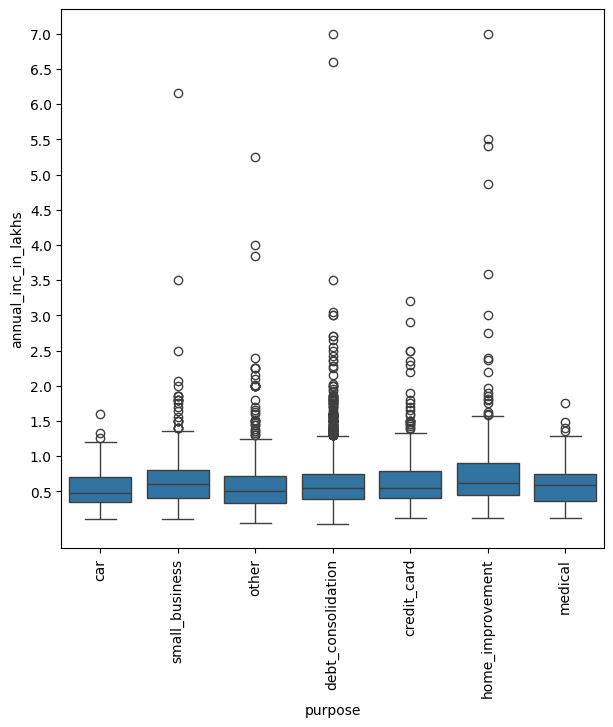

In [124]:
purpose_df=loan_df[['annual_inc_in_lakhs','loan_status','purpose']]
pyplot.figure(figsize=(7,7),dpi=100)
sns.boxplot(purpose_df[(purpose_df['purpose'].isin(['small_business','debt_consolidation','credit_card','home_improvement','car','other','medical'])) & (purpose_df['loan_status']=='Charged Off') & (purpose_df['annual_inc_in_lakhs']<=7)],x='purpose',y='annual_inc_in_lakhs')
pyplot.yticks(ticks=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7])
pyplot.xticks(rotation=90)
pyplot.show()

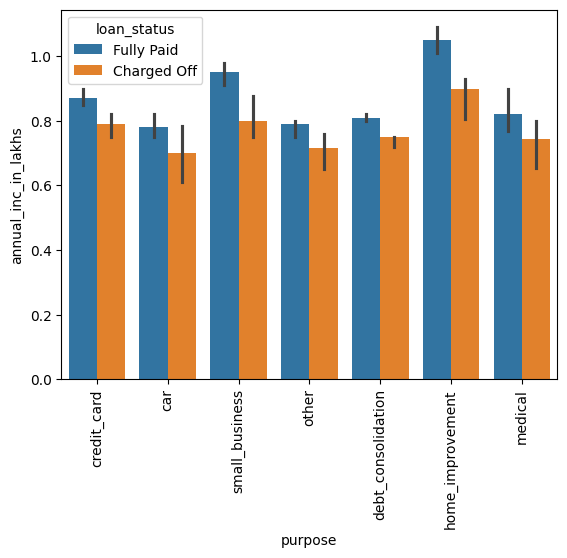

In [125]:
sns.barplot(purpose_df[purpose_df['purpose'].isin(['small_business','credit_card','debt_consolidation','home_improvement','car','other','medical'])],x='purpose',y='annual_inc_in_lakhs',hue='loan_status',estimator=lambda x:np.quantile(x,0.75))
pyplot.xticks(rotation=90)
pyplot.show()

<p><font color='blue' size=4> <b><u>Observation :</u></b>
<ul>    
<li>We have seem the top purposes which showed high default ratios with respect to the total numbers of loans from univariate analysis</li>
<li>The Bivariate analysis was done analysing annual income for each of these loan purposes and the influence on the loan statuses</li>     
<li>There seems to be income disparity at the lower quartile range for each of the purposes</li>
</ul>    
</font></p>

<p><font color='blue' size=4> <b><u>Aim :</u></b>
    To Understand whether debt to income within loan purposes which are influencing the loan defaults</font></p>

In [126]:
purpose_df_dti=loan_df[['dti','loan_status','purpose']]
pivot_purpose_dti=purpose_df_dti[purpose_df_dti['purpose'].isin(['small_business','credit_card','debt_consolidation','home_improvement','car','other','medical'])].pivot_table(index='purpose',values=['dti'],columns=['loan_status'],aggfunc=lambda x:np.quantile(x,0.75))
pivot_purpose_dti

dti           
loan_status        Charged Off Fully Paid
purpose                                  
car                    16.9850    16.1000
credit_card            20.1500    19.3125
debt_consolidation     19.9275    19.3200
home_improvement       17.2925    16.0200
medical                17.7675    17.6450
other                  18.9650    17.6500
small_business         17.4300    16.1200

<p><font color='blue' size=4> <b><u>Observation :</u></b>
    The charged off loans are relatively having higher debt to income ratio with credit card holding highest in both charged off and Fully paid loan status categories, Followed by debt consolidation</font></p>

<p><font color='blue' size=4> <b><u>Aim :</u></b>
    To Understand whether the revolving balance / utilization in credit card loans have any impact on loan defaults </font></p>

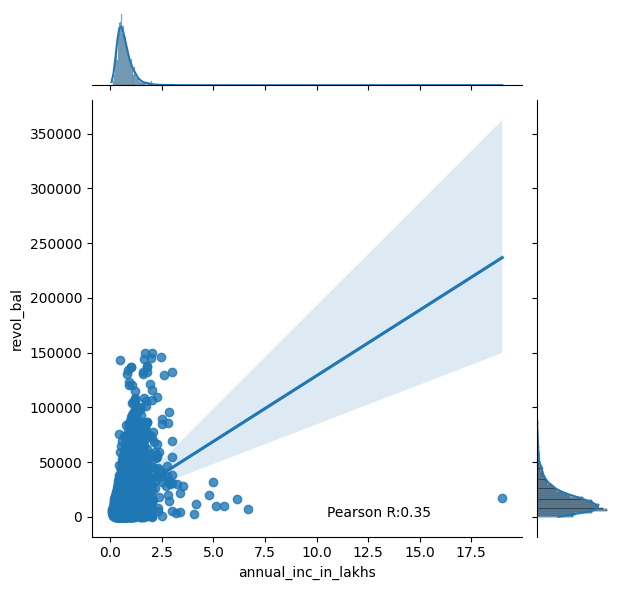

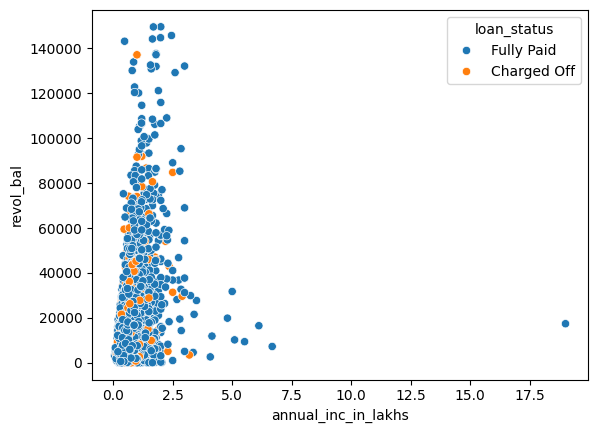

In [127]:
credit_card_df=loan_df[loan_df['purpose'].isin(['credit_card'])]
sns.jointplot(credit_card_df[['annual_inc_in_lakhs','revol_bal','revol_util','loan_status']],x='annual_inc_in_lakhs',y='revol_bal',kind='reg')
pearson_coeff=stats.pearsonr(credit_card_df['revol_bal'], credit_card_df['annual_inc_in_lakhs'])
pyplot.text(10.5,1,(":").join(('Pearson R',str(round(pearson_coeff[0],2)))))
pyplot.show()

sns.scatterplot(credit_card_df[['annual_inc_in_lakhs','revol_bal','revol_util','loan_status']],x='annual_inc_in_lakhs',y='revol_bal',hue='loan_status')
pyplot.show()

In [128]:
credit_card_df[(credit_card_df['annual_inc_in_lakhs'] > 3.5) & (credit_card_df['loan_status']=='Charged Off')]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_month,loan_id,annual_inc_in_lakhs,Income Grade,int_rate_desc,loan_amnt_desc


In [129]:
# credit_card_df=loan_df[loan_df['purpose'].isin(['credit_card'])]
credit_card_df['revol_util']=credit_card_df.revol_util.str.rstrip('%')
credit_card_df['revol_util']=credit_card_df.revol_util.astype(np.float64)


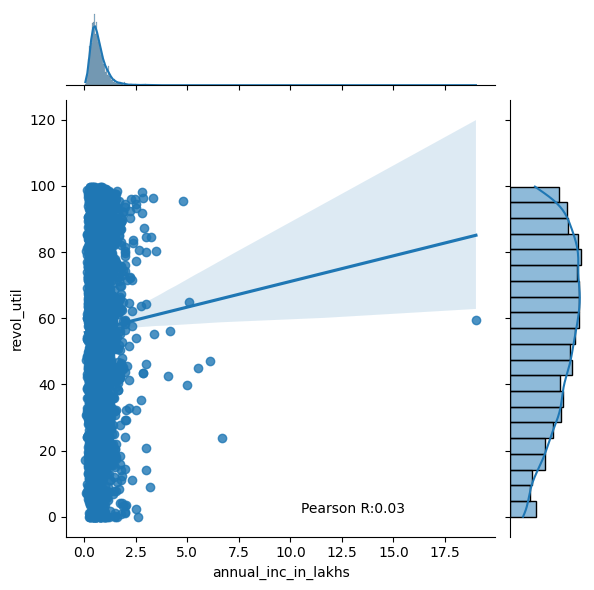

In [130]:
credit_card_df.dropna(inplace=True)
sns.jointplot(credit_card_df[['annual_inc_in_lakhs','revol_bal','revol_util','loan_status']],x='annual_inc_in_lakhs',y='revol_util',kind='reg')
pearson_coeff=stats.pearsonr(credit_card_df['revol_util'], credit_card_df['annual_inc_in_lakhs'])
pyplot.text(10.5,1,(":").join(('Pearson R',str(round(pearson_coeff[0],2)))))
pyplot.show()


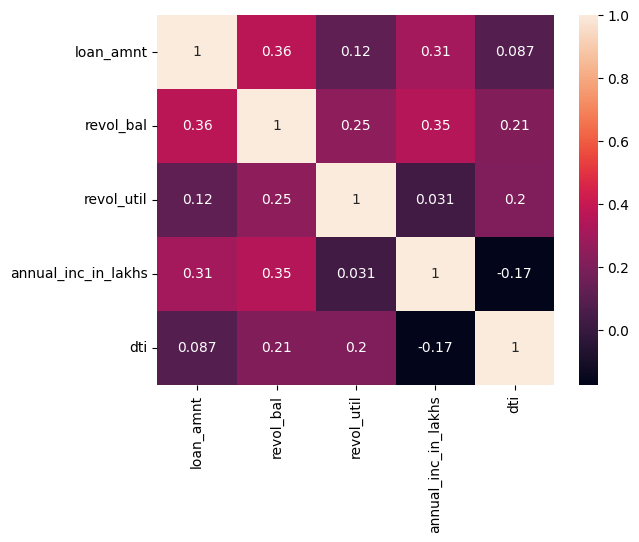

In [131]:
sns.heatmap(credit_card_df[['loan_amnt','revol_bal','revol_util','annual_inc_in_lakhs','dti']].corr(),annot=True)
pyplot.show()

<p><font color='blue' size=4> <b> <u>Observation :</u></b>
<ul>
<li> The revolving balance is strongly correlated to annual income with pearson coeff of .35 </li>
<li> However the utilization is not correlated and the scatter plot utilization of credit is less as annual income raises</li>   
<li> The funded amount is also positively correlated to the annual income of the individual with .31 </li>
<li> There is a weak correlation between dti and revolving balance. As the debt increases credit amount becomes lesser</li>
<li> There is a negative correlation with debt to income as the annual income raises</li>    
</ul>
</font></p>

<p><font color='blue' size=4> <b> <u>Aim :</u></b> To Analyse the impact of employee length with different segments of income grade impacting the defaults</font>

In [132]:
pivot_emp_length=loan_df[['emp_length','Income Grade','loan_status','loan_id']].pivot_table(index='emp_length',values='loan_id',columns=['Income Grade','loan_status'],aggfunc='count')
pivot_emp_length

Income Grade       Lower            Lower Middle                 Middle  \
loan_status  Charged Off Fully Paid  Charged Off Fully Paid Charged Off   
emp_length                                                                
1 year               167        745           91        570          88   
10+ years            174        653          233       1086         349   
2 years              201        961          129        812         104   
3 years              154        789          118        699         122   
4 years              124        601          111        592          70   
5 years              109        558          100        585          97   
6 years               74        367           62        363          62   
7 years               64        231           62        282          55   
8 years               40        184           40        243          40   
9 years               23        140           39        198          38   
< 1 year             250       1206          138        759          91   

Income Grade            Upper Middle                  Upper             
loan_status  Fully Paid  Charged Off Fully Paid Charged Off Fully Paid  
emp_length                                                              
1 year              498           58        446          50        444  
10+ years          1539          315       1795         259       2080  
2 years             719           66        642          65        585  
3 years             698           97        641          64        622  
4 years             552           93        603          62        528  
5 years             519           75        564          76        508  
6 years             374           57        394          51        362  
7 years             334           44        324          38        273  
8 years             252           43        265          40        286  
9 years             217           33        259          24        253  
< 1 year            605           81        636          70        624

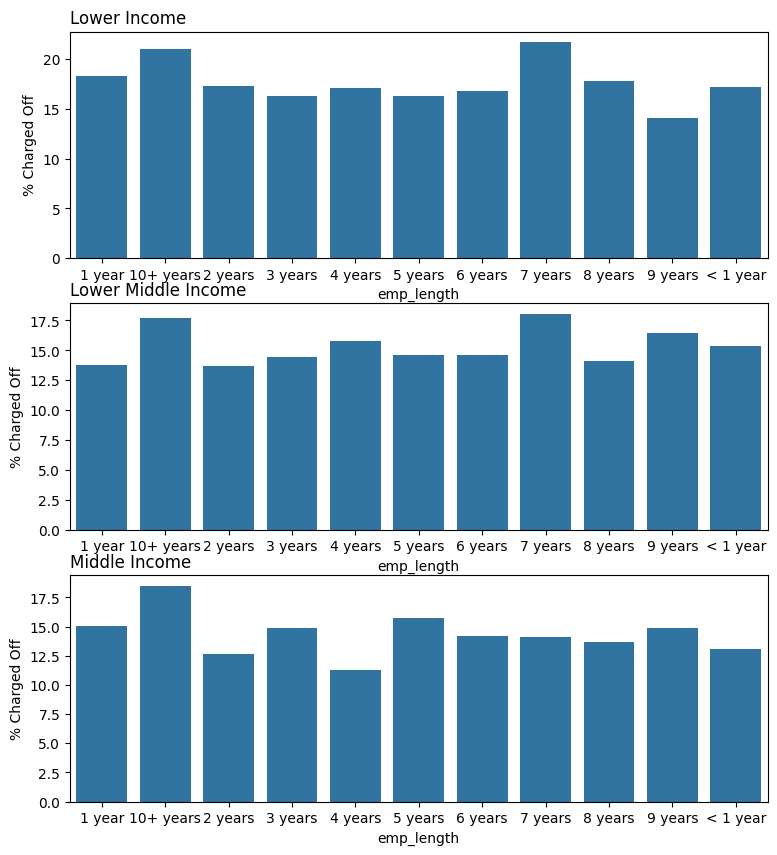

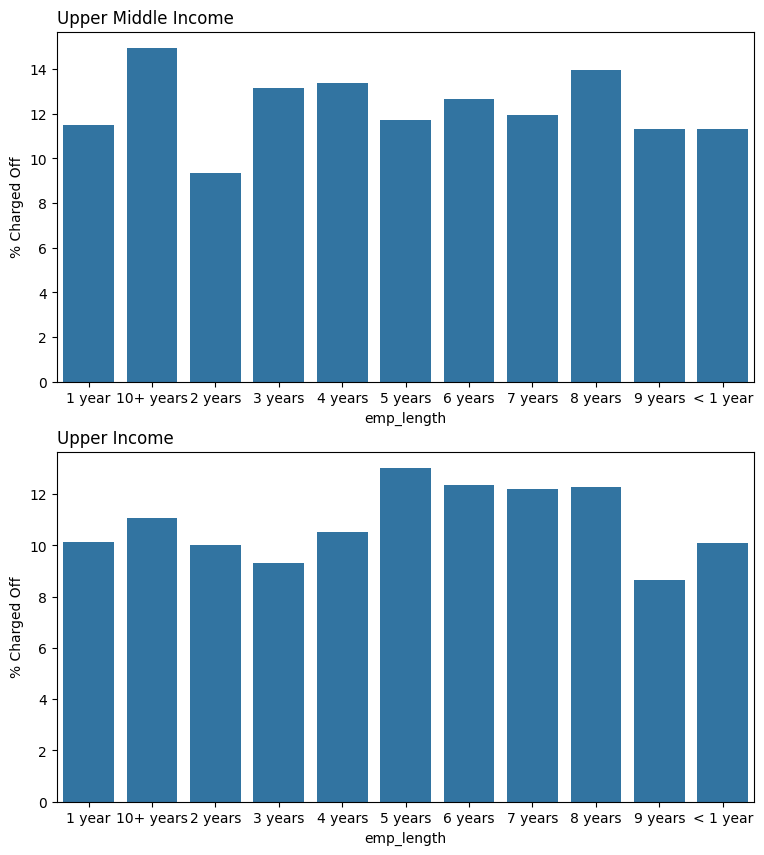

In [133]:
lower_income=(100*pivot_emp_length.iloc[:,[0,1]]['Lower']['Charged Off'])/pivot_emp_length.iloc[:,[0,1]]['Lower'].sum(axis=1)
lower_middle_income=(100*pivot_emp_length.iloc[:,[2,3]]['Lower Middle']['Charged Off'])/pivot_emp_length.iloc[:,[2,3]]['Lower Middle'].sum(axis=1)
middle_income=(100*pivot_emp_length.iloc[:,[4,5]]['Middle']['Charged Off'])/pivot_emp_length.iloc[:,[4,5]]['Middle'].sum(axis=1)
upper_middle_income=(100*pivot_emp_length.iloc[:,[6,7]]['Upper Middle']['Charged Off'])/pivot_emp_length.iloc[:,[6,7]]['Upper Middle'].sum(axis=1)
upper_income=(100*pivot_emp_length.iloc[:,[8,9]]['Upper']['Charged Off'])/pivot_emp_length.iloc[:,[8,9]]['Upper'].sum(axis=1)


pyplot.figure(figsize=(9,10))
ax3=pyplot.subplot(3,1,3)
sns.barplot(pd.DataFrame(middle_income,columns=['% Charged Off']),x='emp_length',y='% Charged Off')
ax3.set_title('Middle Income',loc='left')
ax1=pyplot.subplot(3,1,2)
sns.barplot(pd.DataFrame(lower_middle_income,columns=['% Charged Off']),x='emp_length',y='% Charged Off')
ax1.set_title('Lower Middle Income',loc='left')
ax2=pyplot.subplot(3,1,1)
sns.barplot(pd.DataFrame(lower_income,columns=['% Charged Off']),x='emp_length',y='% Charged Off')
ax2.set_title('Lower Income',loc='left')
pyplot.show()

pyplot.figure(figsize=(9,10))
ax5=pyplot.subplot(2,1,2)
sns.barplot(pd.DataFrame(upper_income,columns=['% Charged Off']),x='emp_length',y='% Charged Off')
ax5.set_title('Upper Income',loc='left')
ax4=pyplot.subplot(2,1,1)
sns.barplot(pd.DataFrame(upper_middle_income,columns=['% Charged Off']),x='emp_length',y='% Charged Off')
ax4.set_title('Upper Middle Income',loc='left')
pyplot.show()


<p><font color='blue' size=4> <b> <u>Observation :</u></b> 
 <ul>   
<li>The 10+ years are consistently having higher percentage of loans charged off</li>
<li>Also the % of loans getting charged off consistently increases as the income falls down in the same 10+ category from 10+ to 20 </li>
 <li>The 7 Year experienced employee seem to have more charged off loans in lower and lower_middle income segments</li>
</ul>
 </font></p>

<p><font color='blue' size=4> <b><u>Aim :</u></b>
    To Understand the correlation between employee Length and dti </font></p>
    

,dti_25,dti_75,dti_median,dti_mean
emp_length,,,,
6 years,8.7725,19.0900,13.905,13.817729
8 years,8.9000,19.2100,13.810,13.781340
7 years,8.6800,18.8300,13.810,13.668471
10+ years,8.6000,18.8700,13.770,13.642595
9 years,8.6300,18.5400,13.715,13.504698
5 years,8.1300,18.7700,13.500,13.389752
4 years,7.9875,18.4075,13.220,13.174541
3 years,8.0000,18.3125,13.245,13.158102
2 years,7.8875,18.2525,13.250,13.065161


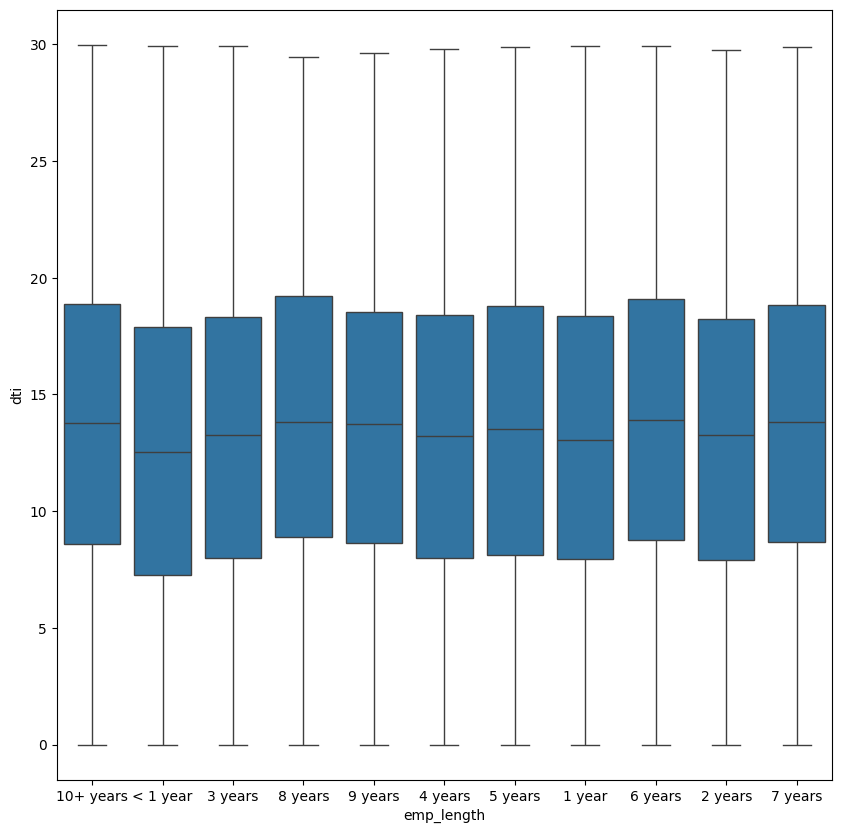

In [134]:
pivot_emp_dti_25=loan_df[['emp_length','dti','loan_status']].pivot_table(index='emp_length',values='dti',aggfunc={'dti':lambda x:np.quantile(x,.25)})
pivot_emp_dti_75=loan_df[['emp_length','dti','loan_status']].pivot_table(index='emp_length',values='dti',aggfunc={'dti':lambda x:np.quantile(x,.75)})
pivot_emp_dti_mean=loan_df[['emp_length','dti','loan_status']].pivot_table(index='emp_length',values='dti',aggfunc='mean')
pivot_emp_dti_median=loan_df[['emp_length','dti','loan_status']].pivot_table(index='emp_length',values='dti',aggfunc='median')


pyplot.figure(figsize=(10,10))
sns.boxplot(loan_df[['emp_length','dti','loan_status']],x='emp_length',y='dti')
pivot_emp_dti=pivot_emp_dti_25.merge(pivot_emp_dti_75,on='emp_length',how='inner').rename(columns={'dti_x':'dti_25','dti_y':'dti_75'})
pivot_emp_dti=pivot_emp_dti.merge(pivot_emp_dti_median,on='emp_length',how='inner').rename(columns={'dti':'dti_median'})
pivot_emp_dti=pivot_emp_dti.merge(pivot_emp_dti_mean,on='emp_length',how='inner').rename(columns={'dti':'dti_mean'})
pivot_emp=pd.DataFrame(pivot_emp_dti)
pivot_emp.sort_values(by='dti_mean',ascending=False,inplace=True)
pivot_emp

In [135]:
pivot_emp_dti_25_loan_status=loan_df[['emp_length','dti','loan_status']].pivot_table(index='emp_length',values='dti',columns='loan_status',aggfunc={'dti':lambda x:np.quantile(x,.25)})
pivot_emp_dti_75_loan_status=loan_df[['emp_length','dti','loan_status']].pivot_table(index='emp_length',values='dti',columns='loan_status',aggfunc={'dti':lambda x:np.quantile(x,.75)})
pivot_emp_dti_mean_loan_status=loan_df[['emp_length','dti','loan_status']].pivot_table(index='emp_length',values='dti',columns='loan_status',aggfunc='mean')

pivot_emp_dti=pivot_emp_dti_25_loan_status.merge(pivot_emp_dti_75_loan_status,on='emp_length',how='inner')
pivot_emp_dti=pivot_emp_dti.merge(pivot_emp_dti_mean_loan_status,on='emp_length',how='inner')
pivot_emp_dti=pivot_emp_dti.rename(columns={'Charged Off_x':'Charged Off_25','Charged Off_y':'Charged Off_75','Charged Off_z':'Charged Off_mean','Fully Paid_x':'Fully Paid_25','Fully Paid_y':'Fully Paid_75','Fully Paid_z':'Fully Paid_mean'})


In [136]:
pivot_emp_dti.sort_values(by='Charged Off_25',ascending=False).head()

loan_status,Charged Off_25,Fully Paid_25,Charged Off_75,Fully Paid_75,Charged Off,Fully Paid
emp_length,,,,,,
7 years,10.8500,8.3200,19.030,18.7325,14.823422,13.458116
8 years,10.3000,8.6425,19.725,19.0650,14.772118,13.617821
10+ years,9.5000,8.4000,19.630,18.7200,14.356391,13.509874
6 years,9.2475,8.7400,19.830,18.8500,14.273889,13.742683
9 years,9.2400,8.5950,18.980,18.4650,14.151975,13.409456


In [137]:
pivot_emp_dti.sort_values(by='Charged Off_75',ascending=False).head()

loan_status,Charged Off_25,Fully Paid_25,Charged Off_75,Fully Paid_75,Charged Off,Fully Paid
emp_length,,,,,,
6 years,9.2475,8.7400,19.8300,18.850,14.273889,13.742683
5 years,9.1800,7.9625,19.7800,18.575,14.273698,13.241997
8 years,10.3000,8.6425,19.7250,19.065,14.772118,13.617821
10+ years,9.5000,8.4000,19.6300,18.720,14.356391,13.509874
1 year,8.8900,7.6800,19.5125,18.045,13.957974,12.899390


In [138]:
pivot_emp_dti.sort_values(by='Charged Off',ascending=False).head()

loan_status,Charged Off_25,Fully Paid_25,Charged Off_75,Fully Paid_75,Charged Off,Fully Paid
emp_length,,,,,,
7 years,10.8500,8.3200,19.030,18.7325,14.823422,13.458116
8 years,10.3000,8.6425,19.725,19.0650,14.772118,13.617821
10+ years,9.5000,8.4000,19.630,18.7200,14.356391,13.509874
6 years,9.2475,8.7400,19.830,18.8500,14.273889,13.742683
5 years,9.1800,7.9625,19.780,18.5750,14.273698,13.241997


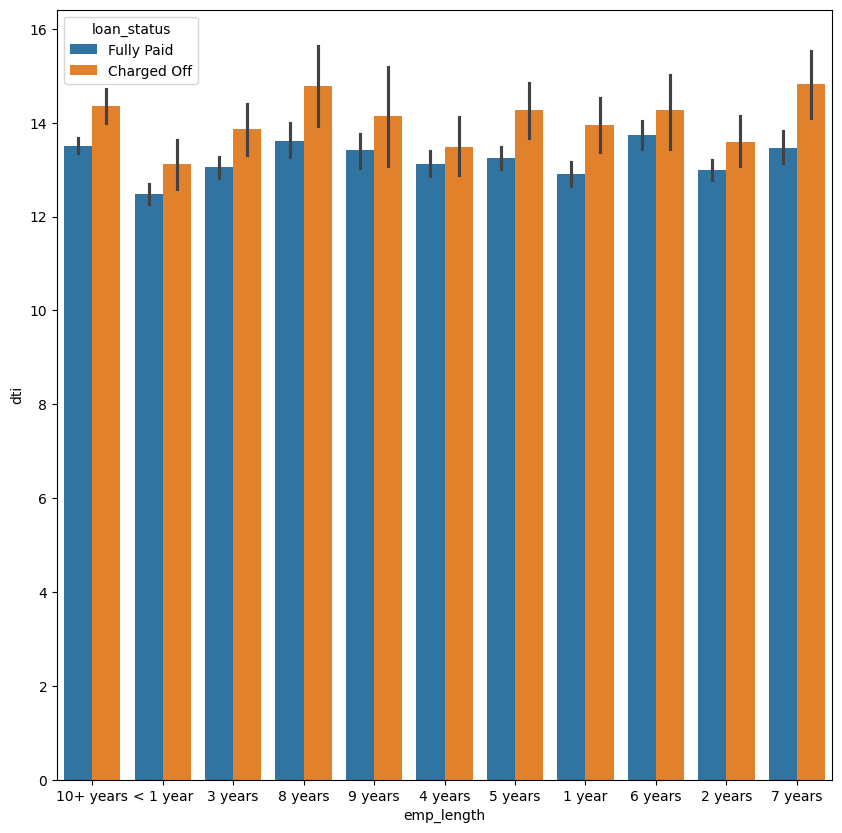

In [139]:
pyplot.figure(figsize=(10,10))
sns.barplot(loan_df[['emp_length','dti','loan_status']],x='emp_length',y='dti',hue='loan_status')
pyplot.show()

<p><font color='blue' size=4> <b><u>Observation :</u></b>
<li> The debt to income is consistently high in mean and 25,75 quantiles for Employees with years of experience 6,7,8,9,10+ </li>
<li> The debt to income is consistently high in mean and 25,75 quantiles for Employees with years of experience 6,8,10+ whose loans are charged off </li>
<li> The debt to income is atleast 1 unit points different in each employee cadre between charged off and fully paid loans</li>   
</font></p>

<p><font color='blue' size=4> <b><u>Aim :</u></b>
    To Understand the correlation between employee Length and property ownership </font></p>

In [140]:
pivot_home_emp_length=loan_df[['emp_length','home_ownership','loan_id']].pivot_table(index='emp_length',values='loan_id',columns='home_ownership',aggfunc='count')
pivot_home_emp_length=pivot_home_emp_length.drop(columns=['NONE','OTHER'])
pivot_home_emp_length

home_ownership,MORTGAGE,OWN,RENT
emp_length,,,
1 year,939.0,212.0,1991.0
10+ years,5284.0,732.0,2448.0
2 years,1424.0,279.0,2571.0
3 years,1534.0,246.0,2214.0
4 years,1357.0,232.0,1740.0
5 years,1434.0,226.0,1525.0
6 years,1055.0,158.0,949.0
7 years,846.0,136.0,722.0
8 years,756.0,116.0,557.0


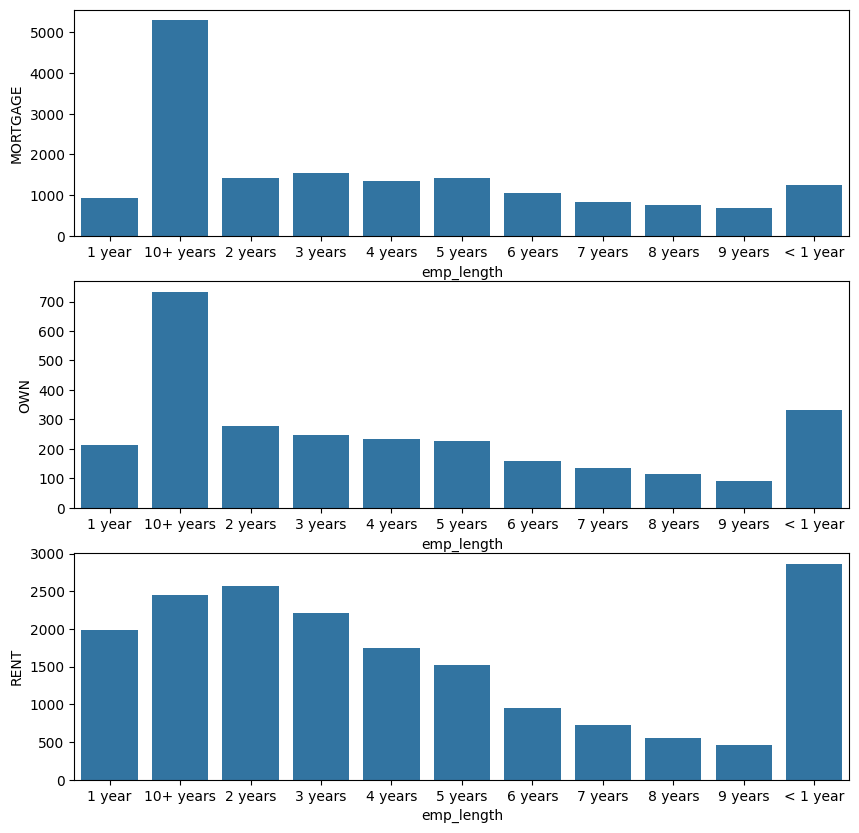

In [141]:
pyplot.figure(figsize=(10,10))
pyplot.subplot(3,1,1)
sns.barplot(pivot_home_emp_length,x='emp_length',y='MORTGAGE')
pyplot.subplot(3,1,2)
sns.barplot(pivot_home_emp_length,x='emp_length',y='OWN')
pyplot.subplot(3,1,3)
sns.barplot(pivot_home_emp_length,x='emp_length',y='RENT')
pyplot.show()

In [142]:
pivot_purpose_emp_length=loan_df[['emp_length','purpose','loan_id']].pivot_table(index='emp_length',values='loan_id',columns='purpose',aggfunc='count')
pivot_purpose_emp_length[['car','credit_card','debt_consolidation','home_improvement']]

purpose,car,credit_card,debt_consolidation,home_improvement
emp_length,,,,
1 year,136,458,1405,145
10+ years,306,1087,4043,875
2 years,155,548,2015,280
3 years,147,509,1870,273
4 years,125,448,1564,226
5 years,127,393,1527,239
6 years,91,272,1084,163
7 years,77,228,830,120
8 years,58,167,713,135


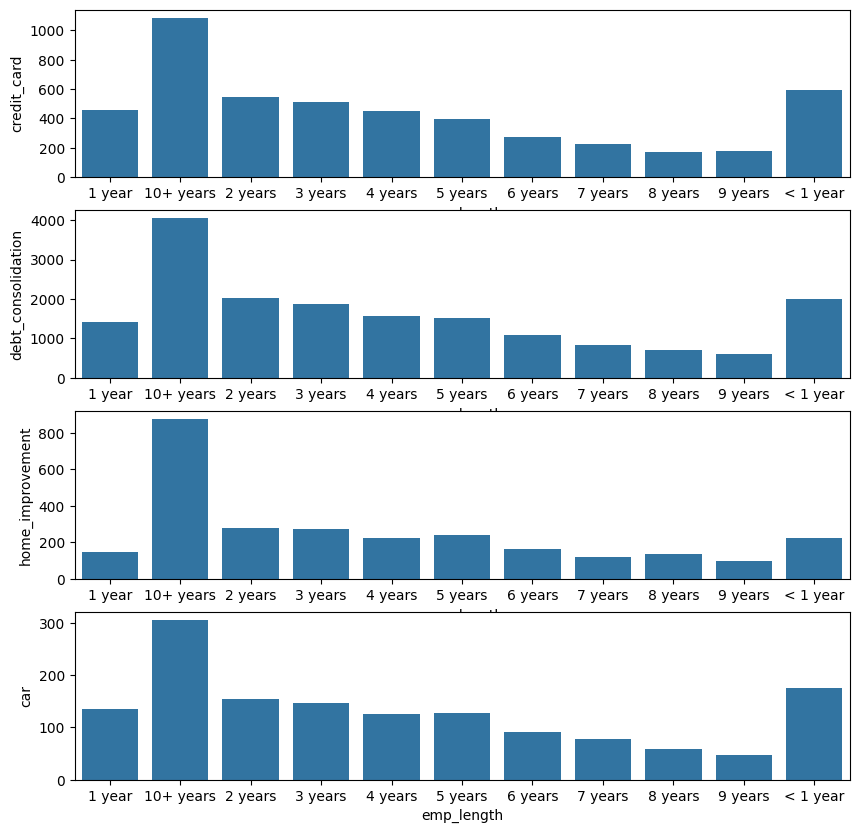

In [143]:
pivot_purpose_emp_length=pivot_purpose_emp_length[['car','credit_card','debt_consolidation','home_improvement']]

pyplot.figure(figsize=(10,10))
pyplot.subplot(4,1,1)
sns.barplot(pivot_purpose_emp_length,x='emp_length',y='credit_card')
pyplot.subplot(4,1,2)
sns.barplot(pivot_purpose_emp_length,x='emp_length',y='debt_consolidation')
pyplot.subplot(4,1,3)
sns.barplot(pivot_purpose_emp_length,x='emp_length',y='home_improvement')
pyplot.subplot(4,1,4)
sns.barplot(pivot_purpose_emp_length,x='emp_length',y='car')
pyplot.show()

<p><font color='purple'><b>Summary of Bivariate Analysis</b>
<ul>
<li>The Bivariate Analysis of annual Income and dti shows as The annual income increases debt to income ratio decreases</li>
<li>There is a negative correlation between the annual income in lakhs and dti</li>
<li>As the income grade increases the loan amount IQR increases indicating a better distribution. There is also a movement in 25th and 75th percentile</li>
<li>The loan amount increases as the annual income of the customer increases. There is a weak positive correlation to indicate that</li>
<li>The income grade analysis of loan amount also gives us insights on many outliers in the 'Lower' Income region which are causing defaults upto 29% in the later part of analysis</li>
<li>As part of Loan amount vs Interest Rate w.r.t income grade , we saw major insights like the 'Loan amount' irrespective of the segments have higher default rates in the 'Very High' interest Category</li>
<li>There is also a strong positive correlation between Loan amount and interest rate with pearson coefficent of .3</li>
<li>We tried to understand the income disparity in the states where there are most distribution and high charge off. 
We understood there is a difference of atleast 5k dollar in 25th quartile and 10k difference in the upper quartile</li>
<li> We analysed the income disparities of customers inside loan purposes . The result was same indicating 5k difference in the lower quartile where there are more charge offs </li>
<li> We analysed if there are insights w.r.t dti within customers segmented by loan purposes. We saw the dti was very for credit card customers ranging in 19-20 in the 75th quartile </li>
<li> We deep dived to credit card segment to identify any insights.
<ul>
   <li>The revolving balance is high as the annual income increases. There is a strong positive correlation indicating the same</li>
   <li>There are no defaults beyond annual income of 3.5 Lakh dollar</li>
   <li>We have also seen a negative correlation between annual income & dti within credit card segment in heat map</li>
   <li>There is also a weak correlation between revolving bal and debt to income , as revolving balance is a form of credit </li>
</ul>
<li>We analysed the emp_length variable w.r.t within different income segments , with dti, with property ownership and purpose
    <ul>
	   <li>The 10+ Years segment is consistently are having higher charge offs in each income segment apart from the Upper Income segment</li>
	   <li>The charge off percentages increases to 20% as the income decreases within 10+ year bucket</li>
	   <li>The dti is high in the 6,7 and 10+ year segments. The number of loans contributed by these segments are little low</li>
	   <li>we checked the property ownership within the segments , again 10+ years have higher contribution in all 3 segments Mortgage , OWN and RENT</li>
	   <li>We saw the subsequent peaks are high in 2,3,4 and 1 year segment in MORTGAGE and OWN property segments, which probably is the reason for high charge off percentage in the univariate analysis</li>
	   <li> RENT segment has highest contribution by customer with employment < 1 year , which could have been another reason for high charge offs, possibly the rent being burden</li>
	   <li>10+ year have higher contribution in top 5 loan purposes again followed by emp length of less than 1 and 2,3,4. This could be a reason for high charge offs in the lower income ranges</li>
	</ul>
</li> 
</ul>
</ul>
</font>
</p>

## Contributors

### SARAVANARAJ MARIAPPAN
### Saritha Goli